In [1]:
import editdistance as ed
import numpy as np
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
LEN = 26

In [4]:
with open("../data/SlO_10/SlO1_R1_spacers_10.txt") as f:
    lines = [x[:LEN] for x in f.readlines()][1::2]

In [5]:
len(lines)

88596

In [6]:
with open("../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    pairs = [[y[:LEN] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [7]:
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])

In [8]:
from collections import Counter, OrderedDict

In [9]:
counter = Counter(lines)
ord_dict = OrderedDict()

In [10]:
u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

In [11]:
args_s = np.argsort(counts)[::-1]

In [12]:
for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [13]:
sp_to_n = {}

In [14]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = -1
    for comp_item in d.items():
        dist = ed.eval(init_item[0], comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [15]:
od = OrderedDict({"aaa" : 10, "acb" : 3, "aac" : 1, "xyc" : 1})

In [16]:
   
def squash(od, t):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in od.items():
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
#             min_ed = t
#             answ_item = -1
#             for comp_item in answ.items():
#                 dist = ed.eval(init_item[0], comp_item[0])
#                 if dist < min_ed:
#                     min_ed = dist
#                     answ_item = comp_item

#             if min_ed < t:
#                 answ[answ_item[0]] += init_item[1]
#                 sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
#                 print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
#             else:
#                 sp_to_n[init_item[0]] = index
#                 index += 1
#                 answ[init_item[0]] = init_item[1]
#                 print("new spacer:", init_item[0], init_item[1])
            min_ed, answ_item = find_closest(answ, init_item, t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [17]:
squash(od, 3)

new spacer: aaa 10
add: acb to aaa 13
add: aac to aaa 14
new spacer: xyc 1


(OrderedDict([('aaa', 14), ('xyc', 1)]),
 {'aaa': 0, 'aac': 0, 'acb': 0, 'xyc': 1})

In [18]:
nd, sp_to_n = squash(ord_dict, 6)

new spacer: GGGCGCACGGAATACAAAGCCGTGTA 5017
new spacer: ATTACGCCTTTTTGCGATTGCCCGGT 4220
new spacer: TGGCTCTGCAACAGCAGCACCCATGA 3772
new spacer: CTGTTTTCGCAAATCTATGGACTATT 2964
new spacer: GAAATGCTGGTGAGCGTTAATGCCGC 2541
new spacer: GACAGAACGGCCTCAGTAGTCTCGTC 2521
new spacer: CAATCTGGGCGACCGGTCATCATCGC 1706
new spacer: GTAGTCCATCATTCCACCTATGTCTG 1411
new spacer: TCGGTTCAGGCGTTGCAAACCTGGCT 1391
new spacer: AAGCTGGCTGGCAATCTCTTTCGGGG 1293
new spacer: TCAACATTATCAATTACAACCGACAG 1174
new spacer: GCGACCGCTCAGAAATTCCAGACCCG 1146
new spacer: GCAGGCGGCGACGCGCAGGGTATGCG 1129
new spacer: AGCGTGTTCGGCATCACCTTTGGCTT 1029
new spacer: CCGGGGGATAATGTTTACGGTCATGC 996
new spacer: TGGGCGGCTTGCCTTGCAGCCAGCTC 990
new spacer: TAGTTTCCGTATCTCCGGATTTATAA 889
new spacer: GCGGGCGTTAACGCGGTGATACTGTT 825
new spacer: CAGAACATACTTCAAAGCCCGAGGCG 818
new spacer: TAGGCCTATAGAGACGAGCGTTCGTT 812
new spacer: CTGCTGCTCGAGCTGGTGGAGTGCTG 795
new spacer: AGTGCTGGACCATTTCAAATTCACAA 736
new spacer: ATAGACCCCGAACAACAATACGCGCA 7

add: GGGCGCACGGAATACAAAGTCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 5597
new spacer: TATAATATGAATTAATTTTTGCGCAT 18
add: GAAATGCTGGTGGGCGTTAATGCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2597
add: TGGCGCACGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 5615
add: CTGTTTTCGCAAACCTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3217
new spacer: TACCAGACGCAGAGTGCCACACAGGT 18
new spacer: GCGGTCGATTTTGCTGGCGTTGTTTC 18
new spacer: GGATCTGCAGACGATGAATTACCGCT 18
new spacer: GGGTTGTGCGCCCTGGTGGGCGAAAA 18
add: GTAGTCCACCATTCCACCTATGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1549
add: GGGCGCACGGAATACAAAGCCATGTA to GGGCGCACGGAATACAAAGCCGTGTA 5633
new spacer: GCTAACTGGCAAAGCTCCTCGTGTGT 18
add: ATTACGCCTTTTTGCGACTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 4796
add: CTGTTTTCGCAAATCTATGGACTTTT to CTGTTTTCGCAAATCTATGGACTATT 3235
add: ATTACGCCTTTTTGCGATTGCCCGGA to ATTACGCCTTTTTGCGATTGCCCGGT 4814
add: AGGCGCACGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 5651
add: CTGTTCTCGCAAATCTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3253
new spacer:

add: AAGCTGGCTGGCAATCTCTTTCGGGA to AAGCTGGCTGGCAATCTCTTTCGGGG 1347
new spacer: AGTATTCAACATTTCCGTGTCGCCCT 9
add: AAGCTGGCTGGCAATCTCTTTCAGGG to AAGCTGGCTGGCAATCTCTTTCGGGG 1356
new spacer: GTTCGCACGGTCATCCGTCCTTCAAG 9
new spacer: GGCTATGCCAGCAATATTCAGCGTTG 9
add: TCGGTTCAGGCGTCGCAAACCTGGCT to TCGGTTCAGGCGTTGCAAACCTGGCT 1507
add: TCAACATTTTCAATTACAACCGACAG to TCAACATTATCAATTACAACCGACAG 1265
add: CAATCTGGGCGACCGGTCGTCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2168
add: ATTATGCCTTTTTGCGATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5002
add: GAAATGCTGGTAAGCGTTAATGCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2679
new spacer: GGCTGGCAGCATAACGAACAAAATCA 9
add: TGGCTCTGCAACAGCAGCACCCAGGA to TGGCTCTGCAACAGCAGCACCCATGA 4379
add: GGGCGCACGGAATACAAAGCCGTGTG to GGGCGCACGGAATACAAAGCCGTGTA 5880
add: CGCCGCGGACTCACGAGCGGGCCATC to CGCCGCGGACTCACGAGCAGGCCATC 26
new spacer: CCATGGCATTTGGCAAACGTCATCAA 9
add: GTAGTCCCTCATTCCACCTATGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1629
add: TCAACATTATCAACTACAACCGACAG to TCAACATTATCAATTACAACCGACA

add: CACACCGTCGCCGGTGCGCGATAAAA to CACACCGTCGCCGGTGCGCGATAACA 587
new spacer: TTTGCCACCCGAGTCCATAAATTCTT 7
new spacer: CGGCATTGTCGACCAGGTGCAACTCA 7
new spacer: CGAACTGGACGAACGGAACGGCGAA 7
add: TTCGCCGCCATCATCCTGTGGTGCCG to TTCGCCGCCATCATCCTGTGGTGCCA 347
add: ATTACGCCTTTTTGCCATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5066
new spacer: AGTATGCGTTCAATCACTGTCAGGCC 7
add: GAGGGCCTGGAAGCACTACCAGAAGC to GAGGGTCTGGAAGCACTACCAGAAGC 273
new spacer: ATGAGTAAACTTGGTCTGACAGTTAC 7
new spacer: GCCGTCCAGAATTTTTTAAAGCGCTT 7
add: CAGAGCATACTTCAAAGCCCGAGGCG to CAGAACATACTTCAAAGCCCGAGGCG 903
new spacer: TCGTGCACCCAACTGATCTTCAGCAT 7
new spacer: TCTCGATGGCTGTAAGTATCCTATAG 7
add: GTAGACCCCGAACAACAATACGCGCA to ATAGACCCCGAACAACAATACGCGCA 747
add: ATCACGATAACGCTGCTGTGATTTGT to ATCACGATAACGCTGCTGTGATTCGT 518
add: GTAGTCCATCATTCCACCTACGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1652
add: CAGGTTCGTAAAGGCGAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 444
add: GACAGAACGGCCTCAGTAGTCTAGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2788
add: GAAAT

new spacer: GCCAACAGTGAATCGCAGCAACCTCC 6
add: GAATGATCCCAAATTTGGGTTACAAA to GAATGATCCCAAATTTGGGTTACAGA 350
add: GTCGTCCATCATTCCACCTATGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1682
new spacer: GCAAGCTTTCCCTATAGTGAGTCGTA 6
add: ATAGCTGCGGCGGAAGGCGTCGAACC to ATAGCTGCGGCGGTAGGCGTCGAACC 615
add: AGCTGGGCGAAATTTTGATTCATCGG to AGCTGGGCGAAATTTTGATTCATCGT 211
add: CTCTACACCACCAACAGCCTGGGTTG to CTCTACACCACCAACAGTCTGGGTTG 29
add: TAGGCCTATAGGGACGAGCGTTCGTT to TAGGCCTATAGAGACGAGCGTTCGTT 922
add: TTCGCCGCCATCATCCTGTGGCGCCA to TTCGCCGCCATCATCCTGTGGTGCCA 360
add: TATACCGCCGTACATATTTTTCTGCC to TATACCGCCGTACATATTTCTCTGCC 374
add: GACAGAACAGCCTCAGTAGTCTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2826
add: CAGAAAATACTTCAAAGCCCGAGGCG to CAGAACATACTTCAAAGCCCGAGGCG 928
new spacer: CCTTTTGATATTCGTGAACCAGACTT 6
add: TCGGTTCAGGCGTTGCAAACCTGGTT to TCGGTTCAGGCGTTGCAAACCTGGCT 1576
new spacer: GCGTAATAGCGAAGAGGCCCGCACCG 6
add: CTAATCAGGTCGTCGTACTCAGCGCC to TTAATCAGGTCGTCGTACTCAGCGCC 224
new spacer: ATACCGCAGCAAATTACGGTTCCAGA 6
a

add: AAGGAATCATGCCTTAATAGACCCCA to AAGTAATCATGCCTTAATAGACCCCA 208
add: AACATCGGAAACGGCTTCGCGGCGGC to AACATCGGAAACGGATTCGCGGCGGC 11
add: AACGCCAGGTTGTCGCCGCTCTGCGT to AACGTCAGGTTGTCGCCGCTCTGCGT 649
add: TTCCGTACAGACTGCCGGATATTATT to TACCGTACAGACTGCCGGATATTATT 552
add: GGACTTAAAGACCGCATCACAGTACT to GGACTTAAAGATCGCATCACAGTACT 455
add: AGTGCTGGACCATTTCAAATTCAAAA to AGTGCTGGACCATTTCAAATTCACAA 820
add: TCAACATTAACAATTACAACCGACAG to TCAACATTATCAATTACAACCGACAG 1360
add: ACATGAATGTCGGTTCAGACCGCGTT to ACATGAATGTCGGTTCAGACCGTGTT 235
add: CCGGGGGATAATGTTTACGGTAATGC to CCGGGGGATAATGTTTACGGTCATGC 1277
add: GCGACCGCTCAGAAATTCTAGACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1503
add: TCGGTTCAGTCGTTGCAAACCTGGCT to TCGGTTCAGGCGTTGCAAACCTGGCT 1602
add: ATAGACCCCGAACAACAAAACGCGCA to ATAGACCCCGAACAACAATACGCGCA 769
new spacer: CAGGAAGAGGGCGGGCCGCTCGGGGA 5
add: CAATCTGGGCGACCGTTCATCATCCC to CAATCTGGGCGACCGGTCATCATCGC 2258
add: GGCATAGCCAGGCTGAACCGGCGACG to GGCATAGCCAGGCTGATCCGGCGACG 13
add: CGATGACTCGAGTATGGATTCTCCGG 

add: CAGAACATACTTCAAAGCCCGAGCGT to CAGAACATACTTCAAAGCCCGAGGCG 946
add: GTAGCGTGGCGACGACCGGCGATTGA to GTAACGTGGCGACGACCGGCGATTGA 191
add: ATAACCTGTTTAACCAGGCGACGGGA to ATAACCTGTTTAACCAGGCGACGGGT 248
add: CCGGGGGATAATGTTTTCGGTCATGC to CCGGGGGATAATGTTTACGGTCATGC 1289
add: ATCTTCTTGCTCAGGAACGTCAGTAG to ATCTTCTTGTTCAGGAACGTCAGTAG 257
new spacer: TCTAGAGGATCTACTAGTCATATGGA 4
add: ATCCCCCATGTTGTGCAAAAAAGCGG to TCCCCCATGTTGTGCAAAAAAGCGGT 61
add: GGTCAACTGCTCACGTTTCTCGATCT to GGTCAACTGCTCACGTTTCTCAATCT 382
add: CAAGTGATATCCATCATCGCACCCAG to CAAGTGATATCCATCATCGCATCCAG 709
add: TCGCACCGCGTTAATCCGGCAGAAGA to TCGCACCGCGTTAATCCGGCAGAAAA 434
add: GACAGAACCGCCTCAGTAGTCTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2862
add: TATACTGCCGTACATATTTCTCTGCC to TATACCGCCGTACATATTTCTCTGCC 388
add: GGGCGCACTGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6028
add: GACAGAACGGCCTCAGTAGTATCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2866
new spacer: ATCAGCGGATGAACATTAGGGTAAAA 4
add: TGAATAATCGGAAAGACGCTGCAAAG to TGAATGATCGGAAAGACGCTGC

new spacer: ATGAACGTCTCGTCGTCCATCATCTC 4
add: CAGGTTCGTAAAGGGGAACCCGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 488
add: GCTGGTTTTGGATCGTCCCGCGCTCG to GCTGGTTTTGAATCGTCCCGCGCTCG 140
new spacer: ACGTACTCATGCGGGCGTTCTTCCTT 4
add: GGACTTAAAGATTGCATCACAGTACT to GGACTTAAAGATCGCATCACAGTACT 463
add: CTGTTTTCGCTAATCTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3555
add: TGGCTCTGCAACAGCAGCACACATGA to TGGCTCTGCAACAGCAGCACCCATGA 4527
add: GTTACGCTGCCTGAGTATCGCAATTC to GTTACGCTGCCTGAATATCGCAATTC 158
add: GCAGGCGGCGACGCGCTGGGTATGCG to GCAGGCGGCGACGCGCAGGGTATGCG 1563
add: GGCAACATAACGAACAGAATCAACGT to GGCAACATAACGAACAAAATCAACGT 370
new spacer: GTTGGGTAACGCCAGGGTTTTCCCAG 3
new spacer: TTCCCAGCTGGAATTTTGATTTGCAC 3
add: GTCGCCGGGTTGACTTTCCATGATGA to GTCGCCGGGTTGATTTTCCATGATGA 137
add: TACCGTACAAACTGCCGGATATTATT to TACCGTACAGACTGCCGGATATTATT 571
add: GGGGTTATCGTTGTTTTGCCAGCGTC to GGGGTTGTCGTTGTTTTGCCAGCGTC 160
add: TGCATGGGTTTGGCTTCCTCTTTGAC to TGCATGGCTTTGGCTTCCTCTTTGAC 431
add: CTGTTTTCGCAAATCTAGGGACTATT to CTGTTT

add: CGATTAATAAAGCCAAGAGTAAAGCG to CGATGAATAAAGCCAAGAGTAAAGCG 224
add: TCCGTCCACCCTGGTAGCCGCCCTTG to TCCGTCCACCCTGATAGCCGCCCTTG 471
add: AGGCCTATAGAGACGAGCGTTCGTTA to TAGGCCTATAGAGACGAGCGTTCGTT 1027
add: TGGCTCGGCAACAGCAGCACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4536
add: TCCGTCAACCCTGATAGCCGCCCTTG to TCCGTCCACCCTGATAGCCGCCCTTG 474
add: ATATTTCAGAGCAAAAAACAAAGCCA to ATATATCAGAGCAAAAAACAAAGCCA 377
new spacer: GATCGCGCCGCTGGGGTAAAGCACGT 3
new spacer: AACAACCTTGCCGCGTACAGCCCCAA 3
add: GATCAGATAAATGGCGAGACGAACCT to GATCAGATAAATGGCGAGACGATCCT 538
add: GAAATGCTGGTGAGCGTTAACGCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2821
add: GAGCGAAGGTGCAACATTATCCCCAT to GAGCGAAGGTGCAACATTATCACCAT 98
new spacer: TGCGTAATGGGCTACCTGAACTTCAC 3
add: GACAGAACGGCTTCAGTAGTCTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2899
add: CGAGCAGTATACAGAACCCAAGAACG to CGAGCAGTATACAGAACTCAAGAACG 433
add: CAGGTTCGTAAAGATGAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 494
add: CCTGCGTAGCTGATCACGATTTCCGG to CCTGCGTAGTTGATCACGATTTCCGG 122
add: TAGCCTATAGA

add: ATTCATCAGTGTGATCCACTGCATCC to ATTCATCAGTGTGATCCACTGCATGC 211
add: CAGGCGGCGGCGCGCAGGGTATGCGC to GCAGGCGGCGACGCGCAGGGTATGCG 1593
add: CTGCTGATCGAGCTGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 888
add: TGCTTCTGTCCCAACTGAACAGCGCC to TGTTTCTGTCCCAACTGAACAGCGCC 260
add: GTCGCCGGGTTTATTTTCCATGATGA to GTCGCCGGGTTGATTTTCCATGATGA 140
add: AGCTCCTGGCTCAATATCCGGAAGAG to AGCTCCTGGCTCAATATCTGGAAGAG 134
add: TTCATACGCTGCGCCAGTTCGGGGAT to TTCATACGCTGCGCCAGTTCGGTGAT 53
add: TTCTACAGTGTCAACAATCGTTCCCT to TTTTACAGTGTCAACAATCGTTCCCT 298
add: AGCTGGATTCTGCTCTAATTATTACA to AACTGGATTCTGCTCTAATTATTACA 142
add: CACACCGTCGCCGGTGCGCAATAACA to CACACCGTCGCCGGTGCGCGATAACA 638
add: CTGTTTTCGTAAATCTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3582
add: TTTGCCGCTGCCAGCATTGCTGGCGC to TTTGCCGCTGTCAGCATTGCTGGCGC 135
new spacer: TCGACGGGCATATAGTGGCAGCTCCC 3
new spacer: CCCTCAAATTCCGTCGATAACGTGGG 3
add: AGTGCAGGACCATTTCAAATTCACAA to AGTGCTGGACCATTTCAAATTCACAA 862
add: CCGCCGTTGGCACCGCCAAACTCCGG to CCGCCGTTGGCACCGTCAAACTCC

add: CCGGGGGATATTGTTTACGGTCATGC to CCGGGGGATAATGTTTACGGTCATGC 1347
add: ACTGGTGTTGTCTGTTTCGTGACGCT to CCTGGTGTTGTCTGTTTCGTGACGCT 242
add: TCAACATTATTAATTACAACCGCCAG to TCAACATTATCAATTACAACCGACAG 1387
add: CAATCTGTGCGACCGGTCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2329
add: ACACCCAAACACAAGCCCAAATCGTG to ACACCCAAACACAAGCCCAAATCGCG 119
add: ATTACGCCTTTTTGCGATTGCCCTGT to ATTACGCCTTTTTGCGATTGCCCGGT 5197
add: CATAAAGAAACTATTTTGGGTTTCGT to CATAAAGAAACTATTTTGCGTTTCGT 240
add: TGGATGGCTTTGGCTTCCTCTTTGAC to TGCATGGCTTTGGCTTCCTCTTTGAC 442
add: CTGCTGCTCGAGCTGATGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 896
add: GGGGTTGTCGTTGTTTTGCCAGGGTC to GGGGTTGTCGTTGTTTTGCCAGCGTC 168
add: AAAACCAAACTTCTCCAAAAATTCCA to AAAACCAAACTTCTCCATAAATTCCA 148
add: TCCATCCACCCTGATAGCCGCCCTTG to TCCGTCCACCCTGATAGCCGCCCTTG 478
add: GCGTCGCCATTCTACTAGCTTTTCCT to GCGTCGCCATTCTATTAGCTTTTCCT 587
add: TATAGAGATCGTTTTTGGAACTTACA to TATAGAGATCGTTTTTGGAATTTACA 255
add: GCGACCGCCCAGAAATTCCAAACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1578
add: 

add: ACTATGGCCCCGGCCAAAAACGCGCT to ACTATGGCCCCGGCAAAAAACGCGCT 22
new spacer: ATCAAAATCAACATCCACGTCGGTCT 2
add: ATAATTTGACGATAAAGCAGCGCCCC to ATAATTTGACGATGAAGCAGCGCCCC 152
add: CCAGATTCCGCTTTCTCTACCTTCCC to CCAGATTCCGCTTTCTCTACCTTCTC 62
add: TTAAGCATCAAACCTTTGGGGGACCA to TGAAGCATCAAACATTTGGTGGACCA 156
add: CGATGAATAAAGCCAAGAGTAGAGCG to CGATGAATAAAGCCAAGAGTAAAGCG 228
add: ATTACGCCTTTTAGCGATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5207
add: GCGCCCACTTCGGGATTTGTGGCAGG to GCGTCCACTTCGGGATTTGTGGCAGG 363
add: CCGCCGTTGGCACCGTCAAACTCCTG to CCGCCGTTGGCACCGTCAAACTCCGG 286
add: GAACGAACGGCCTCAGTAGTCTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2913
add: TCGGCCAGCGGCCAGGCTGGCACCCG to TCGGCCAGCGTCCAGGCTGGCACCCG 73
add: GAGGGTCTGGAAGCACTGCCAGAAGC to GAGGGTCTGGAAGCACTACCAGAAGC 297
add: ACCGAGCGCCGCTGGGAGGCGTACCT to ACCGAGCGCCGCTGGGAGGCGTATCT 733
add: CTCTGTCACCTGACTATTTAACGCTA to TTCTGTCACCTGACTATTTAACGCTA 134
new spacer: GCTGTTAGACTATCTGGTTTCGCGGA 2
new spacer: ATTCAAATTAATTTTAATTACGCGTG 2
add: TGCGTGAGCGTATCC

add: TTCAACAGTCGGTCAGCGGAGGCCTG to TTCAACAGTCGGTCAGCGGAAGCCTG 26
add: TCGAACCTGTTTCTCTTAGTGCGCGC to TCGAACCTGTTTTTCTTAGTGCGCGC 288
add: CCCCGTCGTGTAGAAAACTACGATAC to CCCGTCGTGTAGATAACTACGATACG 20
new spacer: GATATCCTCATTGCCTGTGTCGACGG 2
new spacer: AATTTCTATCTTCGCCATGCTCAGCT 2
add: ACGGGTTGCGGTATATGCAGTGTCCA to ACGGATTGCGGTATATGCAGTGTCCA 146
add: CAGGTTCGTAAAGGTAAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 504
new spacer: TTGAACTGTTGATGTTATCAAAATAT 2
add: TGCGTGAGCGTATCGCCGCGCGTTTG to TGCGTGAGCGTATCGCCGCGCGTCTG 476
add: TTATACAGTGTCAACAATCGTTCCCT to TTTTACAGTGTCAACAATCGTTCCCT 305
add: TCGCACCCCGTTAATCCGGCAGAAAA to TCGCACCGCGTTAATCCGGCAGAAAA 462
new spacer: GATGTGCAGGGGATTTTCCTTGAGTG 2
new spacer: TGCTGTCTGGCATATTCGAGGATGTG 2
add: CTTTTTTCGCAAATCTTAGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3605
add: CTGTTTTCGCAAATCTATGGACGATT to CTGTTTTCGCAAATCTATGGACTATT 3607
add: ATCAGTGATATTCAACATTGCGGAGC to ATCAGTGATATCCAACATTGCGGAGC 253
add: GATTTTTTTCGGTGACGGGCAACGCT to GATTTTTTTCGGTGACGGGCAACGGT 62
add:

add: CAATCCGGGCGACCGGTTATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2351
new spacer: TGCGACACGTTCTATGTCGGCACGCC 2
add: CTGAAACCAGTTGGCTCGGTGTTCTT to CTGAAACCAGTTGGCTCGTTGTTCTT 185
add: GTGCGCACGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6105
add: GAAATGCTGGTGAGCATTAATGCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2839
add: GAATGATCCCAAATTTGGGTTCAAGA to GAATGATCCCAAATTTGGGTTACAGA 377
add: ATAGACCACGAACAACAATACGCGCA to ATAGACCCCGAACAACAATACGCGCA 833
add: GGCATAGCCAGGCTGAACAGGCGACG to GGCATAGCCAGGCTGATCCGGCGACG 15
add: TAGGCCTATAGAGACGAGCGTTCATT to TAGGCCTATAGAGACGAGCGTTCGTT 1050
new spacer: TCGTCCGAAACGGTGTCGATGTTGAA 2
add: ATATATCAGAGCAAAAAACAAATCCA to ATATATCAGAGCAAAAAACAAAGCCA 389
add: ACTCACATTACTTGCGTTGCGCTCAC to ACTCACATTAATTGCGTTGCGCTCAC 75
add: GAGACTTTTCACACTGATAATGTTTT to GAGACTTTTCACACTGATAATGTTGT 59
add: AGCAACGGCAGGATCCTCATCGGGTC to AGCAACGGCAGGATCCCCATCGGGTC 76
add: AACTGGATTCTGCTCTAACTATTACA to AACTGGATTCTGCTCTAATTATTACA 146
add: TTCGCCGCCATCATCCTGTGGTGCCT to TTCGCCGCCATCATCCTGTGGTGCC

add: TCGGTTGTTCGGCGTTTTGAAGAGAA to TTGGTTGTTCGGCGTTTTGAAGAGAA 27
add: ATAACCTGTTTAACCAGGCGCCGGGT to ATAACCTGTTTAACCAGGCGACGGGT 264
add: TTGTTTCCGTATCTCCGGATTTATAA to TAGTTTCCGTATCTCCGGATTTATAA 1175
add: ATTAGCCCTTTTTGCGATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5233
add: CAGGCTCGTAAAGGTGAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 514
add: CAAGTGATATCCATCATAGCATCCAG to CAAGTGATATCCATCATCGCATCCAG 736
add: GAATGATTCCAAATTTGGGTTACAGA to GAATGATCCCAAATTTGGGTTACAGA 383
add: CTGCCCAAAGGCCTGTATTCCTCTGA to CTGCCCAAAGACCTGTATTCCTCTGA 66
new spacer: TAAGATTGTTACTACCGGCAATAAGG 2
add: CTGCTGAAAAAGAAGGCTCCGGCGTT to TTGCTGAAAAAGAAGGCTCCGGCGTT 155
new spacer: CTGCCGGGTGAAACCACTCGCGGCAG 2
add: GCGGGGGTTAACGCGGTGATTCTGTT to GCGGGCGTTAACGCGGTGATACTGTT 933
add: CGTTGGCTGGAGATATGGGAGTTCCT to CGTTGGCTGGAGATATGGGAGTACCT 57
new spacer: GCCCACGCCTCAACGCGGCACATAAA 2
add: ATAGCTTCGGCGGTAGGCGTCGAACC to ATAGCTGCGGCGGTAGGCGTCGAACC 668
add: ATCATGATAACGCTGCTGTGATTCGT to ATCACGATAACGCTGCTGTGATTCGT 567
new spacer: AGTTGTGA

add: GAACCGCTTTTATTTTTAGACATAGG to GAACCGCTTTTATTTTTAGACATAGA 107
add: CCCCCTGAGCGTAAAAAAAATGCTGA to CACCCTGAGCGTAAAAAAAATGCTGA 51
add: ACATGAATGTCGGTTCAGCCCGTGTT to ACATGAATGTCGGTTCAGACCGTGTT 251
add: AAGCTGGCTGGCTATCTCTTTCGGGG to AAGCTGGCTGGCAATCTCTTTCGGGG 1500
add: CTCTACACCGCCAACAGTCTGGGTTG to CTCTACACCACCAACAGTCTGGGTTG 36
add: GATCGATACCTCGACGGGCTGGCCGT to GATTGATACCTCGACGGGCTGGCCGT 216
add: TGGCTCTGCAACACCAGCACCCCTGA to TGGCTCTGCAACAGCAGCACCCATGA 4575
add: GGGCGCCCGGAATTCAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6121
add: TAGATTGATACTCGTATGCCAGTCAT to TAGATTGATACTAGTATGCCAGTCAT 330
add: TATTTCGCCTTCGGCATTGACGTCAC to TATTTCGCCTTCGGCACTGACGTCAC 195
add: TACCGTACAGACTGCCGGGTATTATT to TACCGTACAGACTGCCGGATATTATT 608
add: ACCATGTACGGCAGTGGGGTTTCCAC to ACCATGTACGGCAGCGGGGTTTCCAC 39
add: GTGCCAGTCCTCTGGTTGACGATCGG to GTGCCAGTTCTCTGGTTGACGATCGG 92
add: GGGAAGCCGTCAACCTCGGCGGGTTT to GGGAAGCCGTCAACCTCGGCGTGTTT 54
add: GCGGGCGTTAACGCGGTGATACTGTC to GCGGGCGTTAACGCGGTGATACTGTT 939
add: CTTGTTT

add: GCGGGCGTTAACGCGGTGGTACTGTT to GCGGGCGTTAACGCGGTGATACTGTT 943
add: CCGCCGTTGGCCCCGTCAAACTCCGG to CCGCCGTTGGCACCGTCAAACTCCGG 294
add: TCCGTCCACCCTGATAGCGGCCCTTG to TCCGTCCACCCTGATAGCCGCCCTTG 490
add: ATTAAATTTTGCAGGAAGCTGTTATC to ATTAAATTTTGCAGGTAGCTGTTATC 124
add: GGGAGCACGGAATACAAAGCCGGGTA to GGGCGCACGGAATACAAAGCCGTGTA 6127
add: TCGACATTATCAATTACAACCGACAG to TCAACATTATCAATTACAACCGACAG 1415
add: ATGGCGTGTCTCAATTGCGCGCTGCC to ATGGCGTGTCTCGATTGCGCGCTGCC 127
add: AGCAACGGCAGGATCCCCATCGGGCC to AGCAACGGCAGGATCCCCATCGGGTC 78
add: GTATATCACGCCGCCAACGGGATCAG to GTATATCACGCCGCAAACGGGATCAG 129
add: AAGCTAGCTGGCAATCTCTTTCGGGG to AAGCTGGCTGGCAATCTCTTTCGGGG 1510
add: ATATATCAGAGCAAAAGACAAAGCCA to ATATATCAGAGCAAAAAACAAAGCCA 397
add: ATCCACGCCGTCCTGAATATCGAAGC to ATCCATGCCGTCCTGAATATCGAAGC 36
add: GCGACCGCTCAGAAATTCCAGATCCG to GCGACCGCTCAGAAATTCCAGACCCG 1586
new spacer: GATATGCCGTTTGACGGCGAGCGCCA 2
add: GTAGTCCATCATTCCACCAATGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1783
add: CAGAACCTACCTCAAAGCCCGAGGCG 

add: GTTGTTGTAATAAAGCCCCGGAGGTT to GTTGTTGTAATAAAGCCCCGGAGTTT 32
add: GTATGGGGGCAATACCCCAACCTGTT to GTATGGGAGCAATACCCCAACCTGAT 455
add: CACAGTTTTTGATATATCCCCCCGCT to CACAGTTTTTGATATATCACCACGCT 80
add: AGCGTGTTCGGCATCACCTCTGGCTT to AGCGTGTTCGGCATCACCTTTGGCTT 1235
add: CAAGTTCGTAAAGGTGAACCCGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 518
add: AGCGTGTTCGGCATCACCTTTGGTTT to AGCGTGTTCGGCATCACCTTTGGCTT 1237
add: CTAACCTGTTTAACCAGGCGACGGGT to ATAACCTGTTTAACCAGGCGACGGGT 270
add: GGGGGCACGGAATAAAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6133
add: GATCCGGCTCACGATTTTGTCGATGA to GATCCGGCTCACGATTTTGACGATGA 70
add: TGGCTCTGCTACAGCAGCACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4587
add: GCGGGGGTTAACGCGGTGATACTGGT to GCGGGCGTTAACGCGGTGATACTGTT 947
add: GAGTCGCTCACCTATCTCCTGAATAT to GAGGCGCTCACCTATCTCCTGAATAT 136
add: GAGGGTCTGGGAGCACTACCAGAAGC to GAGGGTCTGGAAGCACTACCAGAAGC 313
add: TTATGGGCTTCAGTAAGCCAGCGTGG to TTATGAGCTTCAGTAAGCCAGCGTGG 215
add: GGTCAACTGCTAACGTTTCTCAATCT to GGTCAACTGCTCACGTTTCTCAATCT 405
add: GCGA

add: GTCAACCACAACACGATTGATGTGCT to GTCAACCACAACCAGATTGATGTGCT 214
add: CAATCGGGGCGACCGGCCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2371
add: TGGCCTTGCAAAAGCAGACCCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4594
new spacer: ATGATGCCGATCGTTTCGGCTTTTCA 1
add: CTTTTCGGAATATGCGGGCAGATTTT to TGTGTCGGAATATGCGGGCTGATTTT 108
new spacer: GATCAGATAAATGGCGCGGGGAACA 1
add: CGTTTTTGCCGGGTTAATTTTAAAAC to CGTTTTTGCCGGGTTTATTTTAAAAC 55
add: CCGCACCGCTTTAAGCCGGCAGAAAA to TCGCACCGCGTTAATCCGGCAGAAAA 481
add: AAGGTGGCTGGCAATCTCTTTCGGGG to AAGCTGGCTGGCAATCTCTTTCGGGG 1523
add: CTGCTGCTCGAGCAGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 929
add: GAGGCAATTAGTAAAATTCCGGCAAC to GAGGCAATTAGTAAAACTCCGGCAAT 15
new spacer: CCGCGCGTTCCCGGTCCGCGACAACA 1
add: GACAGAACGGCCTCAGTAGCTCCGAC to GACAGAACGGCCTCAGTAGTCTCGTC 2936
add: GGCAACATAACGCACAAAATCAACGT to GGCAACATAACGAACAAAATCAACGT 401
add: GGAGCGGGAAGGTCAGACCGCCAACA to GGAGCGGGAAGGTCAGACCGTCAACA 5
add: TCGGTTCAGGCGTTTCAAACCAGGCT to TCGGTTCAGGCGTTGCAAACCTGGCT 1681
add: AGCGTGTTCGGCGA

add: ATTGCTTGGGGGGTAGGGGTCGAACC to ATAGCTGCGGCGGTAGGCGTCGAACC 673
add: TATACCGCCGTACGTATTTCTCTGCC to TATACCGCCGTACATATTTCTCTGCC 412
add: CGAAGGATCAAACATTTGGGGGACCA to TGAAGCATCAAACATTTGGTGGACCA 159
add: CGGCTTTGCAACAGCAGTACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4599
add: CCGACAATCTCCGCATCCAGTCGGTC to CCGACAATCTCCGCCTCCAGTCGGTC 282
add: TCAACATTATCAATTACTACCGACAG to TCAACATTATCAATTACAACCGACAG 1424
add: TAACGTTAAGCGCAAAGTAAGCGATA to TACAGTTAAGCGTAAAGTAAGTGATA 77
add: TGGCTCTGCACCAACAGCACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4600
add: AGGACTGGACCAGTTCAAATTCACAA to AGTGCTGGACCATTTCAAATTCACAA 890
add: AGACGCACGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6141
add: ATTTTCAATCTCTAATAATTCATCTC to ATTTTCAATTTCTAATAATTCATCTC 40
add: TTAAAAGCGAGGGGCGATTCCGCCAG to TTGAGAGCGAGGGGCGATTCCGCCAG 23
add: CGACCGCTCAGAGGTTCCAGACCCGA to CGACCGCCCAGAGGATCCAGACCCGA 7
add: CTTTACACCACAACAGCCTGGGTCGC to CTCTACACCACCAACAGTCTGGGTTG 37
add: GACAAAACGGCCTCAGTAGACTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2939
add: TCAAAA

add: GGGTTGTGCGCCCTGGTGGGCGAGAA to GGGTTGTGCGCCCTGGTGGGCGAAAA 19
add: AAGACGACGTGATCCACAAAGTCGAA to AAGACGACGTGATCCGCAAAGTCGAA 198
add: ACCCTCACTCAAAGATGCTGCTGCGG to ACCCTCACTCAAAGCTGCTGCTGCGG 243
new spacer: TGGGCATGCAAACGCCGCCCCCCTGA 1
add: AATACTGACGGGTTTCACGCTGCTGC to AATACTGACGTGTTTCACGCTGCTGC 27
new spacer: CTCCCTACAGAACGCCGGATTTTATT 1
add: CCGGAGGTTGGGTTGATAGCCCCTTA to CCGGAGCTGGGATTGATAGCGCCTGA 145
add: TGGCAAAACAAACATCGGGGCACGCG to TGGCAAAACAAACATCGGGGTACGCG 92
add: CCGTAAGTGGTTTGAGTGATTATATT to CCGTAAGTGGTTTGAGCGATGATATT 378
add: CACCCTACAGACTGCCGGATATTATT to TACCGTACAGACTGCCGGATATTATT 615
add: TGTGTCGGAATATGCGGGCGGATTTT to TGTGTCGGAATATGCGGGCTGATTTT 109
add: GAAAAGTTTTCCGGGTTTGTCCTGCT to GAAGAGTTTTCCGGCTTTGTCCTGCT 149
add: TTCTCCGCAGCTTTGACCAGCGGATA to TCCTCCGCAGCCTTGACCAGCGGATA 49
add: AGTGCTTGACCATTTCAGATTCACAA to AGTGCTGGACCATTTCAAATTCACAA 893
add: TGAACTGAAGAAATAACATTGACTCC to TGACCTGAAGAAATAACATTGACTCC 169
add: ACCCTCACTCAAAGCTGCTGCGGCCT to ACCCTCACTCAAAGCTGCTGCTGCGG 24

add: ACGAACGCGGCACACCTGGGCGTCTC to ACGAACGCGGCACACCAGGGCGTCTC 533
add: GGGCCCTGGCAGAATGGGGCCTCTTT to GAGCCCTGCCAGAATGGGGCCTCTTT 37
add: GTGGAAACCATCGCGAAGAGCTACCG to GTGGAAACCATCGCGAAGAGCTACTG 27
new spacer: TTTGACCGTACCGTGAGTGCTGATGC 1
add: TTTGCCCCTGGTTGCATTGCTGGCGC to TTTGCCGCTGTCAGCATTGCTGGCGC 143
add: GGGCGCACGGAAATCAAAGGCGTTTA to GGGCGCACGGAATACAAAGCCGTGTA 6153
add: GGGCCGGGTCACGCGAAATACCGGGG to GAGCCGGGTCACGCGAACTACTGGCG 29
add: GGATTATCCTCGCTGAAAGGGGGAAC to GGTTTATCCTCGCTGCGCGGGGAAC 7
add: ATCTCGGGCTGAATAAGATCCCAACA to ATCTCGGGCTGAATGAGATCCCAACA 124
add: CGACGCGGGGAACGGCGTCACGCTCG to GCACGCGGCGAACGGCGTCACGCTCG 260
new spacer: GGTTTTTCCCCCCTAACGCAGGGAAC 1
add: CAGGGGGATAATGTTTACGGTCATGC to CCGGGGGATAATGTTTACGGTCATGC 1395
add: AAGACGACGTGATCCGCAAAGCCGAA to AAGACGACGTGATCCGCAAAGTCGAA 201
add: AAAGTGATGCGATAGACGCGCTGATT to AAAGTGACGCGATAGACGCGCTGATT 41
add: AGTTCGACCCAACTCAGGCCGGACTA to AGTTCGACCCTACTCAGGCCGGACTA 66
add: TCCAGTAGTGCATGAAAACCTTCTTA to TCCAGTAGTGCATGAACACCTTCATA 5
ad

add: GCGTCGCCATACTATTAGCTTTTCCT to GCGTCGCCATTCTATTAGCTTTTCCT 618
add: GCCAGAACCACCGCTGACTTGTCGCG to GCCAGCACCACCGCTGACTTGTCGCG 9
add: CTGCCTTATGGGATGCTATTTGTTTT to CTGACCTATGGGATGCTATTTGTTTT 6
add: ACTTACATTAATTGCGTTGCGCTCAC to ACTCACATTAATTGCGTTGCGCTCAC 81
add: GGCAGCGAGCGAAGCAAAAGACCCCG to GGCAGCGAGCGAAGCTAAAGACCACG 308
add: GCGACCACTCAAAAATTCCAGACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1594
add: CTTAAGCCTTTTTGCGATTACCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5278
add: GTTACGCTGCCTGAACATCGCAATTC to GTTACGCTGCCTGAATATCGCAATTC 164
add: TAAACCACCACCCAGACCACCAATTA to TAAACCACCAGCCAGACCACCAATTA 321
new spacer: CACAGCGCTTCATGAACTGGCCAAAT 1
add: CAAAATATTCCGAGCTTCGTCGGGCC to CAAAATATTACGAGCTTCGTCAGGCC 15
add: TGGGCGGCTTGCCTTTCACCCAGCCC to TGGGCGGCTTGCCTTGCAGCCAGCTC 1119
add: ATGCTGGCGAGGTGACCTATCAACAG to ATGCTGGCGGGGTGACCTATCAACAG 3
add: GTTCAACCACAACGGCACCCCGGGCG to GATCAACCACATCGGCACCCCGGGCG 3
add: TTCCATTCCGTCCTGAATATCGAAGC to ATCCATGCCGTCCTGAATATCGAAGC 39
add: AGGGGCAGGCCGGTAATATTAAAACG to AGTGGCAG

add: ATCACGATAACCCTGCTGTTATTCGT to ATCACGATAACGCTGCTGTGATTCGT 582
add: ACGATGGGAAGGGCTTCTCACCAACT to ACGATGGGAAGGGCTTCTCACCGACT 33
add: ACCCCCAAACCCAAGCCCAAATCACG to ACACCCAAACACAAGCCCAAATCGCG 127
add: TAGCTTCCGTATCTCCGGGTTTATAG to TAGTTTCCGTATCTCCGGATTTATAA 1192
add: TACCGTACAGACTGCTGGATTTTATT to TACCGTACAGACTGCCGGATATTATT 622
add: AATACTGACGTGTTTCACGCTGTTGC to AATACTGACGTGTTTCACGCTGCTGC 28
add: GACAGAACGGCCCCAGTAGTCTCGTT to GACAGAACGGCCTCAGTAGTCTCGTC 2950
new spacer: AGGCGTTTCGGCAACCCCCTTGGGCT 1
add: GGCAACATAACGAACACCATCAACGT to GGCAACATAACGAACAAAATCAACGT 406
add: AAGTAATTGCACCCTCAGCATCATTA to CAGTAATTGCACCCTCAGCATCATTA 509
add: TGGCTTGTTTGCCGGATCAAGAGCTA to TGGTTTGTTTGCCGGATCAAGAGCTA 37
add: CTGCAGCTCGAGCTGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 933
add: GAAATGCTGGTGAGCGTTAATGCCGT to GAAATGCTGGTGAGCGTTAATGCCGC 2873
add: TTGGCCTATAGAGACGAGCGTTCGGT to TAGGCCTATAGAGACGAGCGTTCGTT 1085
add: GTGAGTGCCGTTTTGGGCGGTTGCGA to GGAGTAGCCGTTGTGGGCGGTGGCGA 16
add: TGGTGTGATTACAATTGCGGCACGGA to 

add: ATTACCCCTTTTTGCGATTTCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5289
add: CCAGTACACCCGACGTTTTACGCGGC to CCAGTACACCCGACGTTGTACGCGGC 128
add: GCTCATTTCAAACGCCACAAGCGTTC to GCTCATGTCAAACGCCATCAGCGTTC 54
add: TCCAGAAGTGCATGAACACCTTCATA to TCCAGTAGTGCATGAACACCTTCATA 6
add: ATCACGATAAAGCTGCTGTGATTCGT to ATCACGATAACGCTGCTGTGATTCGT 583
add: GGGCCAGATTTTTATCAACGGCATGG to GGGCGGGATGTTTATCAACGGCATGG 4
add: CAGGCGGCGCCGCGCAGGGTATGCGC to GCAGGCGGCGACGCGCAGGGTATGCG 1670
add: ACCACGTACGGCAGCGGGGTTTCCAC to ACCATGTACGGCAGCGGGGTTTCCAC 42
add: ATCACGATAACGCTGCTGTGATTCGG to ATCACGATAACGCTGCTGTGATTCGT 584
add: AGCGCCACTGAAAATCTGTACGAAAG to AGCACCACTGAAAATCTGTACGAAAG 27
add: GGACTTAAAGGTCCCATCACAGTACT to GGACTTAAAGATCGCATCACAGTACT 508
add: ATAAACCCCGAACAACAAAACGCGCA to ATAGACCCCGAACAACAATACGCGCA 859
new spacer: ATAACGGTAATGCTTAGCGGATACTC 1
add: ATTTCGGCGCGCTTTTTTTCGCTCGG to ATTTCGACGCGCTCTTTTTCGCTCGG 72
add: TCGGTTCCGGCGTTGCAAACCCGGCT to TCGGTTCAGGCGTTGCAAACCTGGCT 1693
add: GTTGTTGTACTAAAGCCCCGGAGTTT to GTTGT

add: ATATATCCGAGCAAAAAACAGAGCCA to ATATATCAGAGCAAAAAACAAAGCCA 403
add: AGCAGCGCGTAAACCAGATCGCCGTT to AGCAGCGCGTAAACCAGATCGCCGAT 15
add: CGAGCAGTATACAGAACTCATGAACG to CGAGCAGTATACAGAACTCAAGAACG 459
add: AGTGCTGGACCATTTCAAATTCACCA to AGTGCTGGACCATTTCAAATTCACAA 898
add: ATTTTGACGCGCTCTTTTTCGCTCGG to ATTTCGACGCGCTCTTTTTCGCTCGG 73
add: CCCCGCCTCGTCGGTGTATTCCGCGA to GCCCGCCTCGTCGGTGTATTCCGCGA 41
add: CCCCCCCCTTAACAAATAGCTGTGAT to ACACGCCCTTATCAAATAGCTGTGAT 626
add: GTTTGAACCCTCGACGGGCGGCCCGT to GATTGATACCTCGACGGGCTGGCCGT 218
add: GTAGGGGTCTTTTGGCGCCGCCACCT to GTAGAGGTCGTTGGGCGCCGCCACCT 15
add: CGCCTCAGTGGCAAAACATCCACCCA to CGACTCAGTGGCAACACATCCACCCC 122
new spacer: TAGGCCTATAGAGACGCTGCAAAGGC 1
add: CAATCTGGGGGACCGGTCATCATGGC to CAATCTGGGCGACCGGTCATCATCGC 2385
add: GCGGGCGTTAACGCGGTGCTACTGTT to GCGGGCGTTAACGCGGTGATACTGTT 955
new spacer: ATTACGCCGGACTAATCCGCATGGCG 1
add: TGCGTGAGGGTATCGCCGCGCGTTTG to TGCGTGAGCGTATCGCCGCGCGTCTG 499
add: GGCTGCTGGTTTCCTGTAATTCGTGA to GGCGGCTGGTTTCCTGTAATTCGTGA 4

add: TGGGCCCTCGCCCTGATAGGCGGTTT to TGGGCCATCGCCCTGATAGACGGTTT 8
add: TAGGCCTATAGAGACGAGCTCTCGTT to TAGGCCTATAGAGACGAGCGTTCGTT 1090
add: CCTCCCTTATTTTTTCATCGTTCATG to CCTCCCTTATTTTTTCATCGTCCATG 29
add: TCGGCCAAACAAGCAGCGCCGTGATG to CCGCCAAACAAGCAGCGCCGTGATGA 136
new spacer: TGGCCTGCTGTACGTTTACACGGAGC 1
add: GATGTGCAGGGGATTTTCCTTTAGTT to GATGTGCAGGGGATTTTCCTTGAGTG 3
add: AAACTCTGGCCGCTCGAATGGCGTTC to AAACTCTGGGCGCTCGAATGGCTGTC 190
add: AGCAACGGCAGGGGCCCCATCGGGTC to AGCAACGGCAGGATCCCCATCGGGTC 80
add: ATAATGCTCATGAGCAGGAATAGGAT to ATAATGCTCATGAGCAGGCATAGGAT 66
add: CAGGTTCGTAACGGTGAAACCGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 534
add: GAACTTAAAGATCGCATCACAGTACT to GGACTTAAAGATCGCATCACAGTACT 512
add: ATGAAAAACCGGACTAAACCACATGG to ATGAAACGCCGGACTAATCCACATGG 55
add: CTATAACTTGTTTTTGCACCACTTTA to CTATAATTTGTTTTTGCACCACTGTA 111
add: GCTGGTTTTGAATCGTCCCGGGCTGG to GCTGGTTTTGAATCGTCCCGCGCTCG 160
add: TCGACATTATCAATTACAACCGAAAG to TCAACATTATCAATTACAACCGACAG 1434
add: TTACCAGCTGGATAACAACGGGAAAG to TTACCA

add: TGGCTCTTCAACAGCAGCCACCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4631
add: TCCTCGGGCGCGCGTTTTCGCAGACC to TCTTCGGGCGCGCGTTTTCGCAGACC 126
add: CTCCCCAACATTTTCGCCGTTCAGGC to GTCACCAACATTTTCGCCGTTCAGGC 697
new spacer: TCGTTACCGCCGCGGGTGGTGACAAC 1
add: ACCGAGTGCCGCTGGGAGGCGTATCT to ACCGAGCGCCGCTGGGAGGCGTATCT 757
new spacer: CGGCGCCGTTTCCTCCGTTTCTGTGT 1
add: GGAAACATAACGAACAAAATCAACGT to GGCAACATAACGAACAAAATCAACGT 408
add: TGTGCCCGACTGCGGGCCGGGTCGAG to TGTGCCCGACTGCGTGCCGCGTCGAG 326
add: GGAATGATATTTCAATAGATAATTAT to GGAATGATATTTCAATAAATAATTAT 303
add: GACAGAACGGGCTCAGTAGTCTCGGC to GACAGAACGGCCTCAGTAGTCTCGTC 2962
add: TGGCCCTGCAACAGCAGCACCCAGGA to TGGCTCTGCAACAGCAGCACCCATGA 4632
add: TCAACATTATCAATTCCAACCGCCAG to TCAACATTATCAATTACAACCGACAG 1435
add: CAGGCGGGGACGCGCGGGGTATGCGC to GCAGGCGGCGACGCGCAGGGTATGCG 1675
add: CGGCAGTTCGCGCCCCGGACTCACGA to CGGCAGTTCGCGCCGCGGACTCACGA 208
add: AACTGGATTCTGCCCTAATTATTAAA to AACTGGATTCTGCTCTAATTATTACA 152
add: GGGCTCTGCAACAGCAGCACCCATAA to TGGCTCTGCAACAGCAGCAC

add: TTATGAGCTTCAGTAAGCTAGCGTGG to TTATGAGCTTCAGTAAGCCAGCGTGG 222
add: GGCAGCGGGCGCGGCAAACACATTCG to GGCAGCGGGCGAGGCAAACACATTCG 13
add: GGAATGATATTTCATTAAATAATTTT to GGAATGATATTTCAATAAATAATTAT 305
new spacer: AACGAAACGGCCTCAGAAGTCTGTTC 1
add: AGGGCTGGACCATTTCAAATTCACAG to AGTGCTGGACCATTTCAAATTCACAA 906
add: GAGACTTTTCCCACTGATAATGTTGT to GAGACTTTTCACACTGATAATGTTGT 62
add: GACAGAACGGCCTCAGTACTCTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2964
add: GGGGTTGTCTTTGTTTTGCCAGCGTC to GGGGTTGTCGTTGTTTTGCCAGCGTC 181
add: CTGGTGGTCGGGCTGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 941
add: TGGCCCTGCAACAGCAGAACCCATAA to TGGCTCTGCAACAGCAGCACCCATGA 4638
add: ATTTTTATATTTTTTAAACATGTGAG to ATTTTGATATTGTTTAATCATGTGAG 19
add: AACGGCGGGTTTTCCCCGCTCTGCGG to AACGTCAGGTTGTCGCCGCTCTGCGT 698
add: GACGCGTTCGTTGCCGGTATAGACCA to GTCGCGTTCGTTGCCGGTATAGACCA 95
add: TATTTCCCCTTCGGCACTGACGTCAC to TATTTCGCCTTCGGCACTGACGTCAC 208
add: GTCCCCAACATTTTCGCCGTCCAGGC to GTCACCAACATTTTCGCCGTTCAGGC 698
add: TTTACCGCCGTAAATATTTCCCTGCC to TA

add: GAACCTAATGCAAAAGATGAATAAAC to GAATCTAATGCAACAGATGAATAAAC 19
add: CTGGAACCCGGTTGGTCGTTGTTCTT to CTGAAACCAGTTGGCTCGTTGTTCTT 198
add: TAGATTGATACTAGTATGCCAGTAAT to TAGATTGATACTAGTATGCCAGTCAT 344
add: ATGCTGCTCGAGCTGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 944
add: TTGCCCGAAGAAATAACATTGACCCC to TGACCTGAAGAAATAACATTGACTCC 176
add: TTTACGCCTTTTTGCGATTGCCGGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5316
add: TTCGATGTAACCCACTAGTGCACCCA to TTCGATGTAACCCACTCGTGCACCCA 66
add: TATAGAGATCGTTTTGGAATTTGCAG to TATAGAGATCGTTTTTGGAATTTACA 277
add: ATCACGATAAGCCTGCTGTGATTCGT to ATCACGATAACGCTGCTGTGATTCGT 592
add: AGCTGGGGGAAATTTTGATTCCTCGT to AGCTGGGCGAAATTTTGATTCATCGT 269
add: TTTGCCGCTGTCAGCATTGCTGGGGT to TTTGCCGCTGTCAGCATTGCTGGCGC 146
add: TGCGTGAGCCTATCGCCGCGCGTCTG to TGCGTGAGCGTATCGCCGCGCGTCTG 502
add: TAGTTTCCGAAGCTACGGATATATAA to TAGTTTCCGTATCTCCGGATTTATAA 1199
new spacer: CTGCTTTCGCAAATCTGCACCCATTA 1
add: ATAAATCAAAGCAAAAACCAAAGCCA to ATATATCAGAGCAAAAAACAAAGCCA 406
add: ATTCGGCGCTGTCTTATGTTGACCAA to 

add: AGCGTGTTCGGCATCGCCTTTGGCTT to AGCGTGTTCGGCATCACCTTTGGCTT 1251
add: CACCGTACAGACTGCCGAATATTATT to TACCGTACAGACTGCCGGATATTATT 626
add: TGTACGCGGGGGGTTTTACGTACAGG to TGTACGCGGCGAGTTTTAGCGACAGG 61
add: CACATACAAACCCACCATCACCTGCA to CACATACAAACCCATCATCACCTGCA 7
add: ACAGGCGGCGACGCGCAGGGTATGCA to GCAGGCGGCGACGCGCAGGGTATGCG 1684
add: GTCTGCGAAAGCAGGACCAGCAGGCA to GTCTGCGAAAGCAGGACCTGCAGGCA 26
add: CCAGATTCCGGTTTCTCTACCCTCTC to CCAGATTCCGCTTTCTCTACCTTCTC 64
add: CAACATTGCGCAAACTATTAACTGGC to CAACGTTGCGCAAACTATTAACTGGC 40
add: CCTGGGGTTGTTGGTTTTGTGACGCT to CCTGGTGTTGTCTGTTTCGTGACGCT 257
add: GTTTTCTCTACATTTAGTTATAGCCG to GTTTTCTCTACATTTAGCTATAGACG 107
add: TTTGGTACCTGCGCTCTGCTGAACCC to TTTGGTATCTGCGCTCTGCTGAAGCC 106
add: CTGTTTTGGGAAATCTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3701
add: TGTTCGCGGGTAGTTTTAGCGACAGG to TGTACGCGGCGAGTTTTAGCGACAGG 62
add: GGCAACCACAACCAGATTGATGTGCT to GTCAACCACAACCAGATTGATGTGCT 220
add: GCAGGGGGCGACCCGCAGGGTATGCG to GCAGGCGGCGACGCGCAGGGTATGCG 1685
add: AAAACCAA

add: TGAATGATCGGGAAGACGCTGCAAAG to TGAATGATCGGAAAGACGCTGCAAAG 342
add: GAAATGGTGGTGAGCGTTAATTCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2890
new spacer: CCGGCCGCCCAAAAAATCCAGACCCC 1
new spacer: CGGAGCTGAATGAAGCCATACCAAAC 1
add: CCGACAATCCCCGCCCCCAGTCGGTC to CCGACAATCTCCGCCTCCAGTCGGTC 294
add: TATGTCGCGCAGGTTGCCCTGTGCAT to CATGTCGCGCAGGTTGCCCTGTGCAT 19
add: ATTACGGCTTTTTGCGATTGGCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5325
add: CCCTCCCACCCATTCGCCAACCGGTG to CCCTCACACCGATTCGCCAAACGGTG 112
add: TCAACATTCTCAATTAAACCCGCCAT to TCAACATTATCAATTACAACCGACAG 1442
add: GGTGAATACTGCGGCAGGCGCTGCAG to GGTGAATACTGCGGCAGGCGCTGCGG 25
add: GCAAACCATCATTCCACCTATGACTG to GTAGTCCATCATTCCACCTATGTCTG 1819
add: ATAGCTGTGGCGGTAGGCGTCGAACC to ATAGCTGCGGCGGTAGGCGTCGAACC 681
add: GCGATGGACCAGGGTATTACACTCGA to GCGATGGATCAGGGTATTACACTCGA 59
add: AGTGGCCGGCCGGTAATATGAAAACG to AGTGGCAGGCCGGTAATATGAAAACG 360
add: ACATCAAGCCCCCAGTATTGGGTTAA to ACATCAAGCCCTCAGTATTGTGTTAA 122
add: TCAATGCCATAATCAAAAGCGCCCCG to TCAATGCCATAATCAAAAGCGGCC

add: ATCCCTCGGACTATCGGCGGCGTGGA to ATCACTCTGACTATCGGCGGCGTGGA 8
add: GGGCGAACGGAATACAAAGGCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6204
add: ATTTCGACGCGCTCTCTTTCGCTCGG to ATTTCGACGCGCTCTTTTTCGCTCGG 75
add: CCCCGTCGTGTAGATAACTACTATAC to CCCGTCGTGTAGATAACTACGATACG 22
add: CACAGTTTAAGATATATCCCCACGCT to CACAGTTTTTGATATATCACCACGCT 92
add: TAAACCACCAGCCAGACCACCTATTA to TAAACCACCAGCCAGACCACCAATTA 328
add: AGCTGGGCGAAATTTTGATTCATCTT to AGCTGGGCGAAATTTTGATTCATCGT 272
add: CAGGCGGCGACGCGCAGGGTATGCGG to GCAGGCGGCGACGCGCAGGGTATGCG 1691
add: ACAGGCCCTTATCAAATAGCTGTGAT to ACACGCCCTTATCAAATAGCTGTGAT 634
add: TCCGCATCGCCCATGCCCGTATTCGG to TCCGCATCGCTCATGCCGATAATCGG 62
add: CAGCACGAAAAATTATTTACTGCCGT to CAGCACGAAAAATTATTTACTGTCGT 22
add: GACGGAACGGCCCCAGTAGGCCCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2972
add: CCCATTCCAATTGATACTCATACGGG to CCCATTCCAATTGATACTCATACGTT 103
add: ACCTAGCGCCGCTGGGAGGCGTATCT to ACCGAGCGCCGCTGGGAGGCGTATCT 763
add: CCAGTGCACCCGACGTTGTACGCGGC to CCAGTACACCCGACGTTGTACGCGGC 134
add: TGCAAAAGC

add: GTAACGTGGCAACGACCGGCGATTGA to GTAACGTGGCGACGACCGGCGATTGA 217
add: GCAACCGGTCAGAAATTCCAAACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1607
add: TGGGCGGCTTTCCTTGCCGCCAGCTC to TGGGCGGCTTGCCTTGCAGCCAGCTC 1126
add: CCGTAAGTGGTTTGAGCGATAATATT to CCGTAAGTGGTTTGAGCGATGATATT 390
add: CAATCGGGGCAACCGGTCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2407
add: TAAACCACCAGCCAGATCACCAATTA to TAAACCACCAGCCAGACCACCAATTA 331
add: TGGGTCGGAATATGCGGGCTGATTTT to TGTGTCGGAATATGCGGGCTGATTTT 110
add: GTACGGGAGCAATACCCCAACCTGAT to GTATGGGAGCAATACCCCAACCTGAT 480
add: GTATGGTAGCAATACCCCAACCTGAT to GTATGGGAGCAATACCCCAACCTGAT 481
add: GACAGAACGGCCTCAGTAGGCCCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2976
add: TGGTTTGATTCCAATTGCCGCACGGA to TGGTGTGATTCCAATTGCCGCACGGA 225
add: AGCTGGGCGAAATTTTGATTCATTTG to AGCTGGGCGAAATTTTGATTCATCGT 273
add: CAATCTGGGCGACCGGTCTTCTTCGC to CAATCTGGGCGACCGGTCATCATCGC 2408
add: ACATGAAGGTCGGTTCAGACCGTGTT to ACATGAATGTCGGTTCAGACCGTGTT 264
new spacer: CCGAACATCAGGGGATGGTTGTGTCG 1
add: CGTGGCAAGTGCGAAGCAGTCGCGG

add: GGCAACATAACGAACAAAAATACGCG to GGCAACATAACGAACAAAATCAACGT 411
new spacer: TGGGGGCGTAATGAGGAGAGCTGGTC 1
add: GACCTGACCCGCACCGAGCTTACCGG to GACCTGACCCGCAACGAGCTTACCGG 17
add: CAGAACATACTTCAAAGCCCGAGGCC to CAGAACATACTTCAAAGCCCGAGGCG 1025
add: GACTCAAAACGGAGCAGGTCAAAATC to GACTCAAAACGGCGCAGGTCAAAATC 60
new spacer: ACTGCCACCAGGGCATCAACCTCGCC 1
add: CAAGTGATATCCATCATCGCATTCAG to CAAGTGATATCCATCATCGCATCCAG 768
add: CCCACAATCTCCGCCTCCAGTCGGTC to CCGACAATCTCCGCCTCCAGTCGGTC 298
add: CGCACCGTCGCCGGTGCGCGATAACA to CACACCGTCGCCGGTGCGCGATAACA 680
add: AACCGCTGGTGAGCGTTAATGCCGCA to GAAATGCTGGTGAGCGTTAATGCCGC 2900
add: AGGTAATCATGCCTTTTAGACCCCAT to AAGTAATCATGCCTTAATAGACCCCA 238
add: CAAACCAAACTTCTCCATAAATTCCA to AAAACCAAACTTCTCCATAAATTCCA 164
add: GTCAACATAACGAACAAAATCAACGT to GGCAACATAACGAACAAAATCAACGT 412
add: ATCGGCCCATGAGACAATAACCTTGG to ATCCGCTCATGAGACAATAACCCTGA 65
add: AAGAAATGATGCTGTATTTAACTATT to AAAAAATGATGCTGTATTTCACTATT 32
add: AAGCAATCATGCCTTATTAGACCCCA to AAGTAATCATGCCTTAATAGACCCCA 

add: CACCAACCGCCCATCTTCCCGATTCC to CACAAACCGCCCATCTTCCCGATTAC 87
add: TTGGCGGCTTGCCTTGCAGCCAGCTC to TGGGCGGCTTGCCTTGCAGCCAGCTC 1130
add: ACCCGCCCTTATCAAATAGCCTTGAT to ACACGCCCTTATCAAATAGCTGTGAT 640
add: TCGAACCTTGTTTTCTTAGTGCCCGC to TCGAACCTGTTTTTCTTAGTGCGCGC 308
add: CCGCAAATGCCAAGATTCGCAAGCCA to CCGCAAATGCCAAGACTCGCAAGCCA 44
add: TTTGGTATCTGCGCTCTGTTGAAGCC to TTTGGTATCTGCGCTCTGCTGAAGCC 108
add: CAGGGTTGCGTGATGCCGGGAAGGCA to CAGGGTTGCGCGATGCCGTGAAGGCA 128
add: CTGTATCAGAGCAAAAAACAAAGCCA to ATATATCAGAGCAAAAAACAAAGCCA 410
add: ATCAGAGCAGTGGAAGCAGGCAAAAA to ATCAGAGCAGTGGAAGCAGGCAAGAA 14
add: CGCGCCCACTTCCGTAATATACAGAT to CGCGCCCACTTCCGTAAAATACAGAT 14
add: TCGCTCATGTAACAGAAACGGGGATT to TCGCCCATGTAACAGAAACGGGGATT 4
add: CAGAACATACTTCAATGCCGGAGGCG to CAGAACATACTTCAAAGCCCGAGGCG 1029
add: GGAATTATATTTCAATAGATAATTAA to GGAATGATATTTCAATAAATAATTAT 317
add: CAATCCGGGCGACCGGCCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2414
add: TCGTGCACCCACCCGATCTTCAGCAT to TCGTGCACCCAACTGATCTTCAGCAT 8
add: GCTGACCTGT

add: AATGCCTCCAGCCTCATTTGAACCGC to AATGCCTCCAGCCTCATTTGAAACGC 42
add: ATGGTTTCGCAAATCTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3713
add: TAGTTTCCGTATATGAATATTTATAA to TAGTTTCCGTATTGGCATATTTTTAA 2
add: AGCGCGTTCGGCATCACCTTTGGCTC to AGCGTGTTCGGCATCACCTTTGGCTT 1262
add: GGCGGCTGGTTTCCTTTAATTCGTGA to GGCGGCTGGTTTCCTGTAATTCGTGA 51
add: GCGATGGATCAGGGTATTACACCCGA to GCGATGGATCAGGGTATTACACTCGA 62
new spacer: ATGAAAACCGTTCATCGACAGCACAC 1
add: TTCGCCGCCATCATCCTGTGGAGCCA to TTCGCCGCCATCATCCTGTGGTGCCA 413
add: TAGATTGATACTAGTATGCCAGGCAT to TAGATTGATACTAGTATGCCAGTCAT 355
add: GGGCGCCCGGAATAGAAAGCCGGGTA to GGGCGCACGGAATACAAAGCCGTGTA 6217
new spacer: CCCGCGGGTCGAATTTGAGCCCAACA 1
add: TAAGTCGTGACTCGGGTCGATGCTGG to TAAGCCGTGACGCGGGTCGCCGCTGG 63
add: GAGGCGCTCACCTATCTCCCGAATAT to GAGGCGCTCACCTATCTCCTGAATAT 145
add: GAAGAGTTTTCCGGCCTTGTCCTGCT to GAAGAGTTTTCCGGCTTTGTCCTGCT 151
add: TGCCTATAGTGACGAGCGTTCGTTAA to TAGCCTATAGGGACAACGTTCGTTAA 2
add: TCGTACTTCGCCTGCCCGTTGCCACC to TCGTACTTCGCCTGCCCGATGCCACC 5
a

add: TGGCTCTGCAACAGAAGCACCCAAGC to TGGCTCTGCAACAGCAGCACCCATGA 4673
add: CCACCGCGCGACGGGTACAACAAATT to CCACCGCTCGACGGGTACAACAAATT 2
new spacer: ATGCATAGGACATAAGACAATGATCT 1
add: GATCAGATAAATGGCGAAACGATCCC to GATCAGATAAATGGCGAGACGATCCT 603
add: GGGCGCACATATTTCTCTGCCCAGTT to GCCGTACATATTTCTCTGCCCAGTT 2
add: CCGCCGTTGGCACCGTCCAACTCCGG to CCGCCGTTGGCACCGTCAAACTCCGG 303
add: ATAAGTGATATCCACCATTGCGGCGC to ATCAGTGATATCCAACATTGCGGAGC 267
add: CAGGTTCGTCACGGTGAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 546
add: TCCGTCCACCCTGATAGCCCCCCTTG to TCCGTCCACCCTGATAGCCGCCCTTG 512
add: CAGAACATGCTCAAAGCCCGAAGCGT to CAGAACATACTTCAAAGCCCGAGGCG 1032
add: TAGGCCTATAGAGACGAGCGTTCGGT to TAGGCCTATAGAGACGAGCGTTCGTT 1113
add: CTGAGAATTGTGTATGCGGCGACCGA to CTGAGAATAGTGTATGCGGCGACCGA 57
add: TACCCTGAGCGTAAAAAAAATGCTGA to CACCCTGAGCGTAAAAAAAATGCTGA 56
add: CAAGTGATATCCCTCGTCGCATCCAG to CAAGTGATATCCATCATCGCATCCAG 770
add: TGGCCTGAAAAAATAACATTGACTCC to TGACCTGAAGAAATAACATTGACTCC 182
new spacer: GTCAACGCGGGCGGCGGCGTAACGCT 

add: TGTAAAAGTTGAATTTCAAATTGCTC to TGTAAAAGTTGATTTTCATATTGCTC 126
add: AAGACGACCTGATCCGCAGAGTCGAA to AAGACGACGTGATCCGCAAAGTCGAA 210
add: GTAACGTGGCGACGACCGGCGGTTGA to GTAACGTGGCGACGACCGGCGATTGA 220
add: ATAGCTGCGGCGGTAGTCGTGTAACC to ATAGCTGCGGCGGTAGGCGTCGAACC 686
add: CCGGCCACTTCGGGATTTGGGGCAGG to GCGTCCACTTCGGGATTTGTGGCAGG 383
add: TGCTCAATAACGTCGTAAATAGCGAA to TGCTCAATAACGTCGTAAATAGCGTA 149
new spacer: ATATCTGCGGCGGTAAGCGACAGCCC 1
add: CAGGTGCGTAAAGGTTAACACGTCAC to CAGGTTCGTAAAGGTGAACACGGCAC 548
add: CGGGTGGATAATGTTTACGGTCATGC to CCGGGGGATAATGTTTACGGTCATGC 1434
new spacer: TCAAAAGCTTCATCATCGCGGACGGC 1
add: GGGCGGACTACGCGGGAGATAGACCA to GGGCGGACTACGCGGGAGATAAACCA 85
add: CGCGGCGGGCTTTGGCTTCCTAGACC to CGCTGCGGGCTTTGGCTTCCTAGACC 6
add: GAACCTTAAATCTCCAAATGGGCACG to GAACCTTCAATCTCCAAATGGGCAGA 59
add: TGGTTTGTTTGCCGGATCAAAAGCTA to TGGTTTGTTTGCCGGATCAAGAGCTA 41
add: TCATTAGAAGCCAATTAACAGCGGCT to TCATTAGAAGCCAATAATCAGCGCGT 47
add: AGTGCAGGCGGTTCAGAGGAATTGTT to AGTGCGGGCGGTTCAGAGGAATTGTT 10


add: CTGTTCTCGCAAATCTAAGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3721
add: AAGCTGGGTGGGAATCTTTTTTGGGG to AAGCTGGCTGGCAATCTCTTTCGGGG 1553
add: TGGCCCCGCAACAGCAGCACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4678
add: GCAGGCGGCGACCCGCAGGGTATGCA to GCAGGCGGCGACGCGCAGGGTATGCG 1708
add: GTTTCGTTCGGTAAATGGAAAGCGGC to GTTACGTTCGGTAAATGGAAAGCGGC 34
add: ATCTTCTTGTTCAGAAACGTAAGAAG to ATCTTCTTGTTCAGGAACGTCAGTAG 282
new spacer: GAAACGCCGGTTGAACGTCGTGCAAA 1
add: CTGTTTTCGCAAACCTATGGGCTATT to CTGTTTTCGCAAATCTATGGACTATT 3722
add: GCGTCCACTTCGGGATTTGTGCCACG to GCGTCCACTTCGGGATTTGTGGCAGG 385
add: ACACGCCCTTATCAAATACCGGTGAT to ACACGCCCTTATCAAATAGCTGTGAT 643
add: TGGCTCTGCAACAGCCGCACCTATGA to TGGCTCTGCAACAGCAGCACCCATGA 4679
add: GGCTATGCCAGCAAAATTCAGCGTTG to GGCTATGCCAGCAATATTCAGCGTTG 10
add: CTGTTTTCGCAAATCAATGGACAATT to CTGTTTTCGCAAATCTATGGACTATT 3723
add: GGTTTGCTCCCATGTTTTCCCGGAAA to GGTTTGCTCCCATGTTTTGCCGGTAA 6
add: CTGCTGCTCGAGCCGGTAGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 961
add: ATAGCTGCGGGGGTTGGCGTCGAACC 

add: TTAAAAAACGTTGGGTATCCGGCTTT to TTAAAAAACGTTGGGTATCCGGTCTA 7
add: GGCGTTTTCATAGCCCTCGACTTTTA to GCCGTTTTCATAGCCCTCGACTTTTA 116
add: CCGGGGATCCGATTTAGGTTCAACTC to CCGGGGATCCGATTTAGGTTCATCTC 3
add: TCAACATTATCACTTACAACCGCCAG to TCAACATTATCAATTACAACCGACAG 1453
add: TCCGTGCACCCTGATAGCCGCCCTTG to TCCGTCCACCCTGATAGCCGCCCTTG 516
add: GAATGATCTCAAATTTGGGTTACAGA to GAATGATCCCAAATTTGGGTTACAGA 413
add: GCTGAACGGGGGGTTCGTGCACACAG to GGCTGAACGGGGGGTTCGTGCACACA 12
add: CCGTAGGAGCGTAGCTGAGTCGAGTT to CCGTAGGAGCGCAGCTGAGTCGAGTT 3
add: CCAGTACACCCGCCGTTGTACGCGGC to CCAGTACACCCGACGTTGTACGCGGC 141
add: GGAATGATATTTCAATAAATAACTAT to GGAATGATATTTCAATAAATAATTAT 320
add: CGTCCGGATCGGTTTCGAGAATTCTT to CGTCCGGATCGGTTTCGAGAATCTCT 207
add: TCAACATTACCAATTACAACCGAAGG to TCAACATTATCAATTACAACCGACAG 1454
add: CTGTTTTCGCAAATCTATGGACCACT to CTGTTTTCGCAAATCTATGGACTATT 3728
new spacer: GCAAGGTTGAGTACATTGATCTAACA 1
add: CAAACTAGATATCACTGAATGCAGCC to CAAACTGGATATCACTGAATGCAGCC 26
add: GGCAACATAACGAACAAGATCAACGT to GGCAA

add: ACCCTCACTCAGAGCTGCTGCTGCGG to ACCCTCACTCAAAGCTGCTGCTGCGG 261
add: TACCGTAAAGACTGCCGGATATCATT to TACCGTACAGACTGCCGGATATTATT 632
add: GATGACGGTTGCGCCGTCCGCGCCAC to GATGACGGTTGCGCCGTCCGCGCCGC 34
add: GATTCCGGCAAGGCGCTGGGCAACAC to GATTCCGGCAAGGCGCTGGTCAGCAC 32
add: TGGCTCTGCAACATCAGGACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4683
add: GTAGGCGGCGACGCGCAGGGTACGCG to GCAGGCGGCGACGCGCAGGGTATGCG 1713
add: TATTCCCCCGTACATATTTCTCTGCC to TATACCGCCGTACATATTTCTCTGCC 433
add: TTAGAGATGACGCGACAAGTCCACAC to TTAGAGATGACGCGACAAGTCCACAA 128
add: CCAGAGCATAGCGGTATTGGTTCTTC to CCAGAGCATAGCGTTATTGGTTCTTC 360
add: GCTGATCTACATCGTCGGCCTGTTTT to GCTGATCTACATCGTCGGCCTGTTTC 22
add: ATTAGGCCTTTTTGCGCTTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5379
add: GATTTTTTTCGGCGACGCGCAGGGTA to GATTTTTTTCGGTGACGGGCAACGGT 68
add: CCGCAAATGCCAAAGCTCGCAAGCCA to CCGCAAATGCCAAGACTCGCAAGCCA 45
add: GGTTTTACAAGCTTAAATGATTTAAA to GGTTTTACAAGCTTAAATGATTTTAA 56
new spacer: ACCATTTGGAGTCTGAAACGACGAGC 1
add: CAAAGGGTCGCCGGTTGCGGATCAAT to CAT

add: TAGTAGAGCGGATGAAAAAGCAGTAA to CAGCAGAGCGGATGAAAAAGCAGTAA 31
add: TCTGTATCAGCTAACCATTTCCAGAA to TCTTTATCAGCTAACCATTTCCAGAA 46
add: CTTTGCCTCGGTCATCGTAACCGTGT to CTTTGCCTCGGTCATCGTAACCGTGA 26
add: GACAGAACGGCCTCACTATTCTCGTC to GACAGAACGGCCTCAGTAGTCTCGTC 2986
add: TTTTTACACGGATCCTGTGGGCCGTG to TTTATACACGGATCCTGTGTGCCGTG 24
add: CAGACCGTCGCCGGTGCGCGATAACA to CACACCGTCGCCGGTGCGCGATAACA 691
new spacer: TGAACGATTCAATATACAGAAAGGGA 1
add: GGCGCACGGAATACAAAGCCGTGTAT to GGGCGCACGGAATACAAAGCCGTGTA 6241
add: AAAAAATGATGCTGTATTTCACCATT to AAAAAATGATGCTGTATTTCACTATT 34
new spacer: TGAGCACGTCCTGTTCGAATCATTGA 1
add: GGACACTATGAACGGATCGGCGCTGA to GGGCACTATGAACGGATCGGCGCTGA 16
add: CAATCTGGCGGACCGGTCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2430
add: GGGGTTGTCGTTGTCTTGCCAGCGTC to GGGGTTGTCGTTGTTTTGCCAGCGTC 184
add: CGGATCTGGTCCAGCCCTAACCGGCG to CGGATCTGGTCCAGCGTTAACCGGCG 12
add: CACACCGGGCGACCGGTCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2431
add: ACGAACGCGGCACACCAGGGCGTCTT to ACGAACGCGGCACACCAGGGCGTCTC 5

add: TAAGCGTCGGCGGCTCGCTGGATTTG to TGAGCGTCGGCGGCTCGCTGGATTTG 66
add: TGGGTTTGCCACAGCAACACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4692
new spacer: TGTCCGCCTTTCTCCCTTCGGGAAGC 1
add: AGTGGCAGGCCGGTAATATGAGAACG to AGTGGCAGGCCGGTAATATGAAAACG 370
add: AAACGCCCTTATCAAATAGCTGTGAT to ACACGCCCTTATCAAATAGCTGTGAT 646
add: TACACGCAGAAAAAAAGGATCTCAAG to TACGCGCAGAAAAAAAGGATCTCAAG 11
add: TAAGCCGCGACGCGGGTCGCCGCTGG to TAAGCCGTGACGCGGGTCGCCGCTGG 67
add: CCACCTGCCGCGACGGGTGCCGGCAG to CCACCTGCCGCGACGGGTGCCAGCAG 55
add: GGGCCCCAGGAAATCAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6249
add: TCGGTTCAGGCGTGGCAAACCTGGCT to TCGGTTCAGGCGTTGCAAACCTGGCT 1726
add: CGCCAATACGCCGTCGAACCGATCGA to CGCTCATACGCCGTCGAACCGACCGA 2
add: GGGTGCGCGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6250
new spacer: TTTAATGCAAAGCTAATTGCACAATA 1
add: AGTTCGACCCTACTCATGCCGGACTA to AGTTCGACCCTACTCAGGCCGGACTA 70
add: TATAGAGATCGTTTTTGCAATTTACA to TATAGAGATCGTTTTTGGAATTTACA 285
add: CAGACTCTATAGGATCTACTAGTCAT to CAGACTCTAGAGGATCTACTAGTCAT 4

add: CAGAACAAACTTCAAAGCCCGGGGCC to CAGAACATACTTCAAAGCCCGAGGCG 1046
add: CTTTTTTCGCAAATCTATGGAATATT to CTGTTTTCGCAAATCTATGGACTATT 3740
add: GATTGCACAGGGGGAGTGTATGGAAC to GATTGCACAGGGGGTGAGTATGGAAC 36
add: ATTAGCCCTTTTTGCGATTCCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5391
add: AGGGTGTTCGGCATACCCTTTGGATG to AGCGTGTTCGGCATCACCTTTGGCTT 1270
add: TGCTCCCCCTGCGCCTACTCCTGCAG to TGCTCCACCTGCGTCTACTCCTGCAG 3
add: GTTACGCCTTTTTGCACTTGCCCGGG to ATTACGCCTTTTTGCGATTGCCCGGT 5392
add: TCTTTATCGTCAATGCGAAATTTTAC to TCTTTATCGTCAATGCGAAATTTTCC 16
new spacer: GGTCGCACAAAGATATCGCTGTCC 1
add: GTTTCATTCGGTAAATGGAAAGCGGC to GTTACGTTCGGTAAATGGAAAGCGGC 35
add: ATCCTCTTCGCTGCCGAATCCCTCTT to ATCCTCTTCGCTGCCGAATCCCTCTG 8
add: GCAGGCGGCGACATGCAGGGTATGCG to GCAGGCGGCGACGCGCAGGGTATGCG 1719
add: TTAGTTGTAACTCTGTAAATCTCGGG to TTAGTTGTAACTCTGTGAATCTCGGG 3
add: CAAACAGGTCGACAGGTTTGGCTAAA to CAAACAGGTCGACATGTTTGGCTAAC 42
add: TTCCCATTCAGCGAGTTCTTTTGCCG to TTCCCATTTAGCGAGTTCTTTTGCCG 35
add: ATGGCGTGTCTCGATTGGCCGCTGCC to ATGGCGT

add: GTTTTCTCATCAAACCATGGTAAGTA to GTTTTCTCATCACAGCATGGTAAGTA 17
add: CATGGCCTGCTCAGCCGGCACCGCCA to CATGGCCTGCTCCGCCGGCACCGCCA 88
add: CTTACTCATTCAAAACGCTGCATGAA to CTTACTCATTCAGAACGCTGCATGAA 3
add: CCGACCAGCACACCCGAACCGCCACC to CCGATCAGCACACCCGAACCGACACC 112
add: TCATTTCCCATGCAAAGTGCTGCATT to TCATTTCCCATGCAAAATGCTGCATT 236
add: CCGCCGTTGGCACCGTCAAACCCCAA to CCGCCGTTGGCACCGTCAAACTCCGG 306
add: GTATGGGAGCAATACCAAACCTGATG to GTATGGGAGCAATACCCCAACCTGAT 492
add: AAACTCTGGGAGCTCGAATGGCTGTC to AAACTCTGGGCGCTCGAATGGCTGTC 204
add: CTGTTGCTCGAGCCGGTGAGGGCTGC to CTGCTGCTCGAGCTGGTGGAGTGCTG 967
add: TGCAGCGAGCGAAGTTAAAGACCACG to GGCAGCGAGCGAAGCTAAAGACCACG 325
add: TGTTCTTCTGCCGGTTTAACACGGTG to TGTTTTTCTGCCGGTTTAACACGGTG 33
add: GGTTTATAAATTTATGTGTATGAATT to GAATTTTAAATTTATGTGTATGAATT 48
add: TAGATTTAAACTAGAATGCCAGGCAT to TAGATTGATACTAGTATGCCAGTCAT 363
add: CGAGCAGTATAAAGAACTCAAGAACG to CGAGCAGTATACAGAACTCAAGAACG 470
add: GTCGCCAGCTCCAACCAGCGGCGGTC to GTCGCCAGCTCCAACTGGCGGCGGTC 54
add: GGCAACATAACG

add: GCGACCGCTCGGAAATTCCCGACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1619
add: TCAGTTCAGGCGTTGCAAACCTCGCT to TCGGTTCAGGCGTTGCAAACCTGGCT 1729
add: CCGGGGGATATGTTTACGGTCATGCC to CCGGGGGATAATGTTTACGGTCATGC 1448
add: CGTGGCAAGGGCGAAGCAGTCGCGGA to CGTGGCAAGTGCGAAGCAGTCGCGGA 28
add: TGGCTTTGCAACAGCAGCCCCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4709
add: GTCGCCTGCCGCCTCAATCTCCCCAC to GTCGCCTGCCGCCTCAATCTCACCAC 86
add: CAATCTGGGCGACCGGTCATCGTTGC to CAATCTGGGCGACCGGTCATCATCGC 2436
add: GCGATCGCTCAGAAATTCCAGACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1620
add: CTATAATTTGTTTTTGCACCACTTAA to CTATAATTTGTTTTTGCACCACTGTA 122
add: TGGCTCTGCAACAGCAGAACCCAGGA to TGGCTCTGCAACAGCAGCACCCATGA 4710
add: AGCTTGGCTAAATTTTAATTCATCGT to AGCTGGGCGAAATTTTGATTCATCGT 284
add: GCTGGTTTTGAATCGTCCGCGCCGCG to GCTGGTTTTGAATCGTCCCGCGCTCG 170
add: ACGGATTGCGGTATAAGCAGTGTCCA to ACGGATTGCGGTATATGCAGTGTCCA 165
add: CACCCCGGCGCCGGTGCCCCATAACA to CACACCGTCGCCGGTGCGCGATAACA 698
new spacer: ATAGCTGGGGGGGGTAGCGGCCAACC 1
add: ATCAGTGATATCCCACATTGCGGAG

add: AGCTCCTGGCTCAATTTCTGGATGAG to AGCTCCTGGCTCAATATCTGGAAGAG 156
add: CCGCCGTTGGCACCGTAAAACTCCGA to CCGCCGTTGGCACCGTCAAACTCCGG 310
add: ACACGCCCTTACCAAATAGCTGTGCT to ACACGCCCTTATCAAATAGCTGTGAT 652
add: CACCCTGAGCGTAAAAAAATGCTCAG to CACCCTGAGCGTAAAAAAAATGCTGA 58
add: TGCATGGCTTTGGCTTCCTCTTCGAC to TGCATGGCTTTGGCTTCCTCTTTGAC 488
add: CTGCCGACAGACCGCCGACGCTTTCG to CTGCCGACTGACCGCCGACGCTTTCG 147
add: ACGGCCTGATTTAGAGTTAAACGTGG to ACGGCCTGATTTAGAGTTAAACATGG 44
add: CGACTCAGTGGCAACACATCAACCCC to CGACTCAGTGGCAACACATCCACCCC 128
add: GTTGTCGGTGGCCATGGGCTGCAGCT to GTAGTCGGTGGCCATGGGCTGCAGCT 44
add: CGGAACATGCTTCAAAGCCCGAGGCG to CAGAACATACTTCAAAGCCCGAGGCG 1051
new spacer: ATAGAGCGCGGTGCGGTCGATGCGCG 1
add: TTAATCAGGCCGTCGTACTCAGCGCC to TTAATCAGGTCGTCGTACTCAGCGCC 253
add: ATGAACGTGGCACACCAGGGCGTCTC to ACGAACGCGGCACACCAGGGCGTCTC 553
add: ATTCATCAGTGCGATCCACTGAATGC to ATTCATCAGTGTGATCCACTGCATGC 235
add: CTGCTTTCGCAAATCTATGGCCCATT to CTGTTTTCGCAAATCTATGGACTATT 3749
add: CGAAGAACGGCCTCAGTAGTCTCGTC to G

add: CCTAACGGGGGGAACTCGCTAACGGG to GCTAACGCGGGGAACTTGCTAACGCG 4
add: TAGGCCTATAGAGACGAGCGTTCTTT to TAGGCCTATAGAGACGAGCGTTCGTT 1131
add: ATCACGATAACGCTGCTGGGATTCTT to ATCACGATAACGCTGCTGTGATTCGT 623
add: ACGGCCTGATTTAGGGTTAAACATGG to ACGGCCTGATTTAGAGTTAAACATGG 45
add: GTTACGCCTTTTTGCGATTGCCCGGC to ATTACGCCTTTTTGCGATTGCCCGGT 5413
add: TAGCCGGGTCTGTATCGAAAACCAGC to TAGCCGGGTCTGTATCGAATACCAGC 19
add: GCGTAATACGGAAGAGGCCCGCACCC to GCGTAATAGCGAAGAGGCCCGCACCG 8
add: TGGACCGATGGGGTCAACATCGCCGA to TGGACCGATGGGGCCAACATCGCCGA 29
add: GAATCCAATGCAACAGATGAATAAAC to GAATCTAATGCAACAGATGAATAAAC 21
add: TCTAACCTGTTTTTCTTAGGGCGCGC to TCGAACCTGTTTTTCTTAGTGCGCGC 317
add: CTGAAACCAGTTGGCTCGTTGTCCTT to CTGAAACCAGTTGGCTCGTTGTTCTT 207
add: TCAACATTTTCAATTCCAACCGACAG to TCAACATTATCAATTACAACCGACAG 1474
add: TTGGTCTGCAACCGCAGCACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4717
new spacer: GAAGCTGGAGGCCCCACCGGCACGGG 1
add: GGGCACTTTGAACGGATCGGCGCTGA to GGGCACTATGAACGGATCGGCGCTGA 17
add: TAGTTTCCGTATACGCATATTTATAA to TAGTT

add: CTGAAGCCAGTTGGCTCGTTGGTCTT to CTGAAACCAGTTGGCTCGTTGTTCTT 209
add: ACCGAGCGCCGCTGGGTGGCGTATCT to ACCGAGCGCCGCTGGGAGGCGTATCT 781
add: TTAATCCATCACTCCACCTAGGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1860
add: GACAGAACGGCCTCAGGAGTCTCGGC to GACAGAACGGCCTCAGTAGTCTCGTC 3003
add: TAAACTACCAGCCAGACCACCAATTA to TAAACCACCAGCCAGACCACCAATTA 346
new spacer: TCGCGGGGCGACGGACTGCCGAACTC 1
add: GTAGTCAATCGTTCCCCCTTGGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1861
add: GCATGCGGCGACGAGCCGGGTATGCG to GCAGGCGGCGACGCGCAGGGTATGCG 1729
add: TCACCCTGCGCGTAACCACCCCACCC to TCACGCTGCGCGTAACCACCACACCC 26
add: GAATTGCTGGTGAGCGTTAATGACGC to GAAATGCTGGTGAGCGTTAATGCCGC 2928
add: CTGCTGCTCGAGCTGGTGGAGTGCAG to CTGCTGCTCGAGCTGGTGGAGTGCTG 977
add: GTAACGTGGCGACGACCGTCGATGGA to GTAACGTGGCGACGACCGGCGATTGA 230
add: TATTACGCCTTCGGCACTGACGTCAC to TATTTCGCCTTCGGCACTGACGTCAC 219
add: AAGCCGCCGTGATGCGCAAAGTCGAA to AAGACGACGTGATCCGCAAAGTCGAA 217
new spacer: CTTTAACCCGCCCCAAACTGGATCAG 1
add: TATAGAGTTCGTTTTTGGAATTTAAA to TATAGAGATCGTTTTTGGAAT

add: ACATGAATGTCGGTTCCGACCGTATT to ACATGAATGTCGGTTCAGACCGTGTT 273
new spacer: CGTGTCCTTGGCCCGGCCTCCTGCCT 1
new spacer: GACCAGCACCGACATGAACGACGCCC 1
add: ACCGAGGGCCGCTGGGAGCCGTATCT to ACCGAGCGCCGCTGGGAGGCGTATCT 783
new spacer: GGTTTATCAATTACAACCGACAGGGA 1
add: CAAGAGCAAGGCTGAGCTGGAGGCCT to CAAGAGCAAGGCTGAGCTTGAGGCCT 11
add: CAACGAAGTTGAGAGCAAAGGTCGCT to CAACGAAATTGAGAGCAAAGGTCGCT 287
add: CATACAGAAACTATTTTGCGTTTCGT to CATAAAGAAACTATTTTGCGTTTCGT 276
add: TCTTACCGTGATGTGAAAGATGAATT to TCTTGCCGTGATGTGAAAGCTGAATT 115
new spacer: GGGCGCTCATCTCCAGCAAGTGCTCG 1
add: CCGGGGGATAATGTTTATCGTCATGG to CCGGGGGATAATGTTTACGGTCATGC 1457
add: CGTTTTTGCCGGATTTATTTTCAAAC to CGTTTTTGCCGGGTTTATTTTAAAAC 61
new spacer: ATTATTGGGGCGTACCACCGTATTTC 1
add: GGTGGTTTTGAAACGTCCCGCGCTCG to GCTGGTTTTGAATCGTCCCGCGCTCG 172
add: CCCATTCCAATTGATGCCCATACGTT to CCCATTCCAATTGATACTCATACGTT 108
add: GAATTTTAAATTTATTTGTATGAATT to GAATTTTAAATTTATGTGTATGAATT 52
add: TGCATGGCTTTGGCTTCCTCTTGGAC to TGCATGGCTTTGGCTTCCTCTTTGAC 492
add: 

add: GTTCTTATAGGGTAGCCGTAGTTAGG to GTTCTTCTAGTGTAGCCGTAGTTAGG 10
add: GGGCCAACGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6287
add: CAGTAATTTCCCCCTCAGCCTCATTA to CAGTAATTGCACCCTCAGCATCATTA 534
add: CCCCGCCCTTTTAAAATAGCTGTGAT to ACACGCCCTTATCAAATAGCTGTGAT 655
add: ACATGCCCTTATCAAATAGCTGTGAT to ACACGCCCTTATCAAATAGCTGTGAT 656
add: GTCGCGAAGCTGATCTACCAGGGAGA to GACGCGAAGCTGATCTATCAGGGAGA 24
new spacer: ACCATTCCCTTCGCCCTTCAAGCCTA 1
add: ATCCACACTTCCGCCGTTATGAATCG to ATCCACATTTCCGCCGTTATGAATCG 42
add: TCGGAAAACAGCCACAATAACGCAAT to GCGGAAAACAGCCAAAATAACGCAAT 20
add: GGCGAACTACCGACCCCTGTTGGACC to GGCGAACAACCGACCCCTGTTGGACC 36
add: AGTTCGACCCTACTCAGGGCGGACTA to AGTTCGACCCTACTCAGGCCGGACTA 71
add: TCGATAATGTATTTGCGGCCGGAAAG to TCGATAATGTATTTGCGGGCAGAAAG 62
add: GGGCGCATGGAGTACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6288
add: ATTTTGCGCCGTATGAGTTTTACGGG to ATTTGTCGCCGTATGAGTTTTACGCG 20
add: TCAGCCAGACGCGGCATTGCGGCTGC to TCAGCCAGACGTGGCATTGCGGCTGC 38
new spacer: ACGGCTTGCCTTGCAGCCAGCTCCAG 1
a

add: ATGAAAACCCCCGGCGTAAATTTTCG to ATGAAAACGCCCGGCGTAAATTTTCG 13
add: TGGCCCTGCAACGGCAGCACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4735
add: GGGCGCCGGGAATACAAACCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6295
add: CTCACAAGTTTTGGGGTCAATAACCG to CTCACCAGTTTTGGGGTCAATAACCG 46
add: TTGCTGAAAAAGAAGGCTCCGTGTAC to TTGCTGAAAAAGAAGGCTCCGGCGTT 179
add: AGTGATAAATTATCCGTTACCGCAAT to AATGATAAATTATCCGTTACCGCAAT 65
add: CGTATTCGTCACACAGCCCTGTCCAG to CGTATTCGTCACACAGCCCCGTCCAG 17
add: AACGCCAGGTTTTCGCCGCTCTGCGG to AACGTCAGGTTGTCGCCGCTCTGCGT 724
add: ACATCGAACTGGATCTCAACAGTGGT to ACATCGAACTGGATCTCAACAGCGGT 40
add: TAAGCCACCAGCCAGACCACCAATTA to TAAACCACCAGCCAGACCACCAATTA 348
new spacer: ATCGTCGAGCATTGCTAAGCCTCCGA 1
add: ATCTCCTTGTTCAGGAACGTCAGTAG to ATCTTCTTGTTCAGGAACGTCAGTAG 286
new spacer: CCAGGGGGCGACCCCGAGGGTAATCG 1
add: GTCAGCCCATTCGGCTTCCCACGCGT to GTCAGCCCATTCGGCTTCCCACCCGT 2
add: TCTTGCCGGTATGTGAAAGCTTAATT to TCTTGCCGTGATGTGAAAGCTGAATT 117
add: ATTACGCCCTTATCAAATAGCTGTGA to ACACGCCCTTATCAAATAGCTGTGAT 658

add: TAAGCCGTGACTCGGGTCGCCGCAGG to TAAGCCGTGACGCGGGTCGCCGCTGG 71
add: TAATTAACTTTTAGACAGAATATCCG to TAGTTAACTTTTAGACAGAATATCCG 154
add: GTTTTCTCTAAATTTTGCTATAAACG to GTTTTCTCTACATTTAGCTATAGACG 117
add: TATGCCGCCGTACATATTTCTCTGCC to TATACCGCCGTACATATTTCTCTGCC 445
add: ACCCCAAATAAAGGTTTACCAGTTTT to ACCCCGGATAAAGGTTTACCAGTGTT 14
add: CTTTTTTCGAAAATTTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3765
new spacer: CCCGGGTTTTTCTGTTTCGTGACCCC 1
new spacer: GTCGTTCGGCTGCGGCGAGCGGTATC 1
add: ATGGCGTATCTCGATTGCGCGCTGCC to ATGGCGTGTCTCGATTGCGCGCTGCC 136
add: AAGCTGGCGGGAAATTTCCTTCGGGG to AAGCTGGCTGGCAATCTCTTTCGGGG 1572
add: TGGTGGGATTCCAATTGCTGCACGGA to TGGTGTGATTCCAATTGCCGCACGGA 238
add: TCCCCCTTAATTGCTCTCAAAGGATT to TCCCCCTTAATTGCTCTCAAAAGATT 66
add: AGTGCTGGACCATTGCAAATTCACAA to AGTGCTGGACCATTTCAAATTCACAA 933
add: CTGCTGCTCGAGCCGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 982
add: GAAATGCTGGGGAGCGTTAAAGCCCC to GAAATGCTGGTGAGCGTTAATGCCGC 2937
add: GCCGAGCGCCGCTGGGAGGCGTATCT to ACCGAGCGCCGCTGGGAGGCGTATC

add: ACCCTCACTCAAAGTGCCTGCTGCGG to ACCCTCACTCAAAGCTGCTGCTGCGG 269
add: GTATGGGGGCAATACCCAAACTTGTG to GTATGGGAGCAATACCCCAACCTGAT 498
add: GAAGGTCTGGAAGCCCTACCAGAAGC to GAGGGTCTGGAAGCACTACCAGAAGC 330
add: AATCCATCAGTTGAACACAAAAGAAG to AATGCATCAGTTGAACACAAAAGTAG 126
add: TGGGGAAACATTTGGAACGGGATTGC to TGGGAAAACATTTGGAACGGGATTGC 18
add: CAGGGTTGCGCGATGCCGTGCAGGCA to CAGGGTTGCGCGATGCCGTGAAGGCA 134
add: GGGCTTTCCGCCTACCCGGGAAATCA to GGGCTTTCCGCCTACCTGCGACATCA 38
add: GAACATACTTCAAAGCCCGAGGCGTA to CAGAACATACTTCAAAGCCCGAGGCG 1065
add: ATGACTAAACATACCCGATGCGCGGC to ATGACTACACGTACCCGATGCGCGGC 87
add: ACTAACGCGGGGAACTCTCGGTTCAG to GCTAACGCAGGGAACTTTCGGTTCAG 6
add: CCACCGATAACCGGTATATTCCGTCG to CCACGCATAACCGATATATTCGGTCG 5
add: TTTGGTGTCTGCGCTCTGCTGAAGCC to TTTGGTATCTGCGCTCTGCTGAAGCC 113
add: CATACGCCTTTTTGCGATTTCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5436
add: AGCCAGGCCCGCGGCTGTCTTATTGA to AGCCAGGCCCACGGCTGTCTTATTGA 59
add: GGCGGCGAGCGAAGCTAAAGCCCACG to GGCAGCGAGCGAAGCTAAAGACCACG 331
add: CAGTAATTGCA

add: TATCGGTTTATCCCCACTAACCCAGG to TATCGGGTTATCCCCGGTAACGCAGG 3
add: CCGAACGGCTCGGAGCTCTCATACCC to CCGAACGGCTCGGCGCTCTCATACCC 102
add: GATCCGGCTCCCGATTTTGACGATGA to GATCCGGCTCACGATTTTGACGATGA 86
add: GTCATCGACTGCGGCGGTCCACCCAC to GTCATCGACTGCGGCAGTCCACTCAT 8
add: CCGGGGGATAATTTTTACGGTCCTGC to CCGGGGGATAATGTTTACGGTCATGC 1469
add: AACGTCAGGTTGTCCCCGCTCTGCGT to AACGTCAGGTTGTCGCCGCTCTGCGT 728
add: GATTGCACTGGGGGTTAGTATGGAAC to GATTGCACAGGGGGTGAGTATGGAAC 38
add: TTTTGCTGACACCGGCAATATTGACC to TTTTGCTGACACCGGCAATACTGAAC 24
add: GAGCGAAGGTGCAACATTAACACCAT to GAGCGAAGGTGCAACATTATCACCAT 116
add: GTTGTCCATCAATCCACCTATGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1879
add: GCCGAGCATGTCGAGCTCACGGGCGC to GCCGAGCATATCGAGCTCACGGGCGC 50
add: GTATATCACGCCGCAAACGGGATAAG to GTATATCACGCCGCAAACGGGATCAG 139
add: TGCTCAATAACGGTGTAAATAGCGTA to TGCTCAATAACGTCGTAAATAGCGTA 160
add: GTTTTCTCTACATTTAGCTAAAGACG to GTTTTCTCTACATTTAGCTATAGACG 119
add: CCAGAGCATAGCGTTATTGCTTCTTC to CCAGAGCATAGCGTTATTGGTTCTTC 368
add: AAGCTGGCTGG

add: TATGAGTAAGCTTGGTCTGACAGTTA to ATGAGTAAACTTGGTCTGACAGTTAC 12
add: TCCCATTCACCAACACCAATATCGCC to TCCCATTCACCAACAACAATATCGCC 47
add: CCCAACAGCACCCCCGAACCGACACC to CCGATCAGCACACCCGAACCGACACC 116
add: CGAATGATCGGAAAAACGCTGCAAAG to TGAATGATCGGAAAGACGCTGCAAAG 357
add: GCTTCCACTTCGGGATTTGTGGCAGG to GCGTCCACTTCGGGATTTGTGGCAGG 391
new spacer: CCCCCATAGTCCGGCGTAGCCTCTGT 1
add: ACGCGCGTACCGGATTGCGGACAACA to ACGCGCGTACCGGATCGCGGACAACA 319
add: TGGCCTGACTGTATCAAGGAGTGCAT to TGGCCTGACTTTATCAAGCAGTGCAT 258
add: TGCGTGAGCGTATCGCCGCCCGCCTG to TGCGTGAGCGTATCGCCGCGCGTCTG 518
add: TATACCGCCGTACCTATTTCTCTGCC to TATACCGCCGTACATATTTCTCTGCC 447
add: CCAGGTTTGGAACTCGGGCCGGTTGA to CCAGGTTTGGAACTCGGGCCAGATGA 90
add: CTGTTTTTGCAAAACTATGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3774
add: GATAGGGTAGAAAGAAATAGCAACAG to GATAGAGTAGAAAGACATAGCAACAG 11
add: GCTACCGCTCAGAAATTCCAGACCCG to GCGACCGCTCAGAAATTCCAGACCCG 1631
add: ATAGACCCCGAACAACAATCTCCGCC to ATAGACCCCGAACAACAATACGCGCA 914
add: CTGTTTTCGTCAATCTATGGACTATT to CT

add: CAATACGGGATAATACCGCACCACAT to AATACGGGATAATACCGCGCCACATA 13
add: GTATGGGGACAATTCCCCAACCTGGT to GTATGGGAGCAATACCCCAACCTGAT 501
add: ATAATTTGACGATGAAGCAGCCCCCC to ATAATTTGACGATGAAGCAGCGCCCC 174
add: CCGATCAGCACACCCGAGCCGACACC to CCGATCAGCACACCCGAACCGACACC 117
add: CCCCGCATAACCGATATATTCGGTCG to CCACGCATAACCGATATATTCGGTCG 6
add: CGATGAATAAAGCCAAGAGGAAACCG to CGATGAATAAAGCCAAGAGTAAAGCG 256
add: TAGTTTCCGTATATGCATTTTTATAA to TAGTTTCCGTATTGGCATATTTTTAA 10
add: GAAGAGTTTTCCGGCTTTGTCCTGCC to GAAGAGTTTTCCGGCTTTGTCCTGCT 162
add: CCCGGGGTTGTCTGTTTCGTGACGCC to CCTGGTGTTGTCTGTTTCGTGACGCT 274
add: ACGAACGCGGCACACCAAAGCGTCTC to ACGAACGCGGCACACCAGGGCGTCTC 565
add: CGTTTTGCCGGGTTTATTTTCAAACC to CGTTTTTGCCGGGTTTATTTTAAAAC 62
add: CGATTCCTCATAGCTGCCACTCGACT to CGATTCCTCGTAGCTGCCACTCGACT 146
add: CAGGATCGTAAAGGTGAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 563
add: CGACTCAGTGGCAACACACCCACCCC to CGACTCAGTGGCAACACATCCACCCC 133
add: AGAATTCAACATTTCCGTTTCGCCCT to AGTATTCAACATTTCCGTGTCGCCCT 12
add: AGCTTGGCGAA

add: GAAAGTCTGGTGAGCGTTAATGCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2949
add: GACACCAACATTTTCGCCGCTCAGGC to GTCACCAACATTTTCGCCGTTCAGGC 722
add: AAGATGACGTGATCCGCAAAGTCGAA to AAGACGACGTGATCCGCAAAGTCGAA 222
add: AGTCATGAGCCACCATTGGTATTGTG to AGTCATGAGCCACCATCGGTATTGTG 5
add: ACACACCAGAACCGCGCCAACTTACC to ACACACCAGGACCGCGCCAACTTACC 77
add: AATGTTTGCCGCACCCAAATGCGATC to AATGTTTCCCGCACCCAAATGCGATC 60
add: ATCCGAGCAGTGGAAGCAGGCAAGAA to ATCAGAGCAGTGGAAGCAGGCAAGAA 16
add: CAGAACATACTTCCAAGCCCGAGGCG to CAGAACATACTTCAAAGCCCGAGGCG 1071
add: CCGACCAGCAAACCCGAACCGAAACC to CCGATCAGCACACCCGAACCGACACC 118
add: GGGCGTGCGGAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6319
add: TCGCATCGCGTTAATCGGGCTGAAAA to TCGCACCGCGTTAATCCGGCAGAAAA 517
add: CATAAAGCAACTATTTTGCGTTTCGT to CATAAAGAAACTATTTTGCGTTTCGT 285
add: ATCCATGCCGTCCTGAATATCGAAGA to ATCCATGCCGTCCTGAATATCGAAGC 46
add: GGTCGACTGCTCACGTTTCTCAATCT to GGTCAACTGCTCACGTTTCTCAATCT 432
add: GATCAGATAAATGGCGGGAGGATCCT to GATCAGATAAATGGCGAGACGATCCT 625
add: AGCTCCTG

add: CTCGCCGCCATCATCCTGTGGTGCCA to TTCGCCGCCATCATCCTGTGGTGCCA 436
add: CGCGCACGGCGTTTGCCCTTGTCGGT to CGCGCACGGCGTTTGCCCTCGTCGGT 23
add: AAGTAACCATGCCTTAATAGGCCCCA to AAGTAATCATGCCTTAATAGACCCCA 249
add: ATTACGCCTTTTTGGCATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5456
add: AAGTAATCACGCCTTAATAGGCCCCA to AAGTAATCATGCCTTAATAGACCCCA 250
add: TTTGCTACCCGCTCAAAACCGCCGAC to TTTGCTACCCGCTCAAAACCGCCGAT 105
add: GCGGGGGTTAACGCGGTTATTCTGTT to GCGGGCGTTAACGCGGTGATACTGTT 1006
add: GTCCTTGGGAACCCCAACAGTGATTG to GTCCTTGTGAACGCCAACAGTGATTG 40
add: CTCCGCGGGTTTATTTTCCATGATGA to GTCGCCGGGTTGATTTTCCATGATGA 171
add: ATCTTCTTGTTCAGGAACGTCAGAAG to ATCTTCTTGTTCAGGAACGTCAGTAG 288
new spacer: ATGACGCCTTTATCCGCTTACCCGAT 1
new spacer: GAAATACTGGCGTGCGTAAATTCGTC 1
add: GTAGTCCATCATTCCCCCTTCGTCTG to GTAGTCCATCATTCCACCTATGTCTG 1893
add: GCAAGCTTTCCCTATAGTGAGTCGCA to GCAAGCTTTCCCTATAGTGAGTCGTA 10
add: GCGATGGATCAGGGTATCACACTCGA to GCGATGGATCAGGGTATTACACTCGA 66
add: TCCCGTAGTGCATGAACACCTTCATA to TCCAGTAGTGCATGAACACCTTCATA

add: AAAACCCAACTTCTCCATAAATTCCA to AAAACCAAACTTCTCCATAAATTCCA 177
add: TGCTGGATTAGTTTATCGAAACCAGA to TGCTGGATGAGTTTATCGAACACAGA 20
add: GAGGCGCTCACCTATCTCCTGCATAT to GAGGCGCTCACCTATCTCCTGAATAT 152
add: ATTTCCCCTTTTTTCGATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5460
add: TGGCTCTGCAACAGCAGGACCCATGA to TGGCTCTGCAACAGCAGCACCCATGA 4762
add: AGTTCGCTTAGTAGCCTTTTTTCTGT to AGTTCGCTGAGTAGCCTTTTTTCTGT 19
add: GCTCAAGTCAGAGGTGGGGAAACCCG to GCTCAAGTCAGAGGTGGCGAAACCCG 5
add: GCCGAGCATATCGAACTCACGGGCGC to GCCGAGCATATCGAGCTCACGGGCGC 51
add: GATAAGAAAAATGGCGAGACGATCCT to GATCAGATAAATGGCGAGACGATCCT 627
new spacer: TGCAAATCTATGGACTACTGCTTT 1
add: ACAATGGGAAGGGCTTCTCACCGACT to ACGATGGGAAGGGCTTCTCACCGACT 44
add: AGCGTGTTCGGTGAATTCTTTGGCTT to TGCGTGTTCGGCGAATTCTTTGGCTT 14
add: TTTATTACAATAGGTGGACACGCTAC to TTTACTACAATAGGTGGACACGCTAC 16
add: GCGGGGGTTAACGGGGTGTTACTGTT to GCGGGCGTTAACGCGGTGATACTGTT 1008
add: TTCGGGAAGCGGCCCGGCGCTGGCTG to TTCGGGCAGCGGCCCGGCGCTGGCTG 29
add: CGGGGGGATAATGGTTACGGTCATGC to CCGGGGGA

add: ATAGCTGCGGTGGTAGGCTTCGAACC to ATAGCTGCGGCGGTAGGCGTCGAACC 706
add: AATGGCGGGCACATATTCAACTGATG to AATGGCGCGCACATATTCAACTGATG 4
add: TGTGCCCGACTGCGGGCCGCGTCGAG to TGTGCCCGACTGCGTGCCGCGTCGAG 342
add: TAATGCGGGGAACTCGCCTGACATTG to TAACGCGGGGAACTCGCCTGACATTG 11
add: TTCGATTTAACCCCCTCGTGCACCCA to TTCGATGTAACCCACTCGTGCACCCA 74
add: ACGGATTGCGGTATATGCAGGTTCCA to ACGGATTGCGGTATATGCAGTGTCCA 172
add: AAGTAAACATGCCTTAATAGGCCCCA to AAGTAATCATGCCTTAATAGACCCCA 251
add: CAACGAAATTGAGAGCAAAGGACGCT to CAACGAAATTGAGAGCAAAGGTCGCT 290
add: CGTTGGCTGGGGATATGGGAGAACCT to CGTTGGCTGGAGATATGGGAGTACCT 67
new spacer: GGGCGCACGGGGGAACACGCTGGTTT 1
add: CTGAAACCAGTTGGATCGTTGTTATT to CTGAAACCAGTTGGCTCGTTGTTCTT 214
add: GGGCGCACGGAATCCAAAACCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6335
add: AGTGGCAGGCCGGTAAATTGAAAACG to AGTGGCAGGCCGGTAATATGAAAACG 382
add: TATAGAGATCGTTTTTGGTTCTTCCT to TATAGAGATCGTTTTTGGAATTTACA 298
add: AAAACCTGTTTAACCCGGCGACGGGT to ATAACCTGTTTAACCAGGCGACGGGT 293
add: CGTCAAAACTGTACGTGACGTCCATG to CGTC

add: ATCACGATAAAGCTGCTGTGCTTCGT to ATCACGATAACGCTGCTGTGATTCGT 647
add: TGGCAAAACCAACATCCGGGGACGCG to TGGCAAAACAAACATCGGGGTACGCG 109
add: TAGGCCTATAGAGCCGAGCGTTCGGG to TAGGCCTATAGAGACGAGCGTTCGTT 1150
add: TCGCCCCGCGTTAATCCGGCAGACAA to TCGCACCGCGTTAATCCGGCAGAAAA 520
add: GACAGAACGGCCTCAGTATGCTCTTC to GACAGAACGGCCTCAGTAGTCTCGTC 3039
add: TTTACGCCTTATTGCGATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5468
add: CAAAACATTCTTCAAAGCCCGAGGCC to CAGAACATACTTCAAAGCCCGAGGCG 1076
add: AATTATAAATTTTCCGTTACCGCAAT to AATGATAAATTATCCGTTACCGCAAT 67
add: TAAAATTGGCATCATAGATGGATTGA to TAAAATTGGCATCATAGATGGTTTGA 50
add: CAATTTGGGCGACCGGTCCTCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2482
add: TATGTAAGGCCAGGGCAGGCTGTGAC to TATGTAAAGCCAGGGCAGGCTGTGAC 23
add: TACTCAATGGCAACCGTCACGGCCTT to TACTCAATGGCAACCGTCACGGCCTG 12
add: GGGCGCAAGAAATACAAAGCCGTGTA to GGGCGCACGGAATACAAAGCCGTGTA 6342
add: GTCGCCGGGTTGATTTTCCATGTTGA to GTCGCCGGGTTGATTTTCCATGATGA 174
add: AAGACGACGTGATCCCCAAAGTCGAA to AAGACGACGTGATCCGCAAAGTCGAA 224
add: TCC

add: TCCCGTCCCGACTGCCGGCTATTATT to TACCGTACAGACTGCCGGATATTATT 665
add: ATAGACCCCGAACAACAATCCGCGCC to ATAGACCCCGAACAACAATACGCGCA 922
add: CAATCTGGTCGACCGGTCATCATCGC to CAATCTGGGCGACCGGTCATCATCGC 2484
add: ATCCTCTTGTTCAGGAACGTCAGTAG to ATCTTCTTGTTCAGGAACGTCAGTAG 291
add: GTTTTCGCGGTAGTATTTAGTCGAAA to GTTGTCGCGGTAGTATTTAGTCGAAA 83
add: GGGCACACGGCATTCAAAGCCGCGAA to GGGCGCACGGAATACAAAGCCGTGTA 6349
add: CGTCCGGATCTGTTTCGAGAATCTCT to CGTCCGGATCGGTTTCGAGAATCTCT 217
add: GGGCGCACGGGGTACAAAGCCGGGTA to GGGCGCACGGAATACAAAGCCGTGTA 6350
add: ATTACGCCTGTTTGCGATTGCCCGGA to ATTACGCCTTTTTGCGATTGCCCGGT 5473
add: ACATGAATGTCAGTTCAGACCGTGTT to ACATGAATGTCGGTTCAGACCGTGTT 280
add: CTGCTGCTCGAGATGGTGGAGTGCTG to CTGCTGCTCGAGCTGGTGGAGTGCTG 997
add: CAGGTTCGTGAAGGTGAACACGGCAC to CAGGTTCGTAAAGGTGAACACGGCAC 572
add: TTGGAGGTAAGGCCCGCCGGGGCGGC to TTGTAGGTAAGGCCCGCCGCGGCGGC 73
add: CCAGGTGTTGTCTGTTTCGTGACGCT to CCTGGTGTTGTCTGTTTCGTGACGCT 277
add: GGCCGCGAGCGAAGCTAAAGACCACG to GGCAGCGAGCGAAGCTAAAGACCACG 337
add: GGT

add: TAGTTAACTTTTAGACAGAACATCCG to TAGTTAACTTTTAGACAGAATATCCG 161
add: TTAATCAGGTCGTCGTACTCAGCGTC to TTAATCAGGTCGTCGTACTCAGCGCC 264
add: ATTAGGCTTTTTTGCGATTGCCCGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5478
add: CGACTCCTCGTAGCTGCCACTCGACT to CGATTCCTCGTAGCTGCCACTCGACT 150
add: CCGGGGAATAATGTTTACGGTAATGG to CCGGGGGATAATGTTTACGGTCATGC 1495
add: TGCGTCGGAATATGCGGGCTGATTTT to TGTGTCGGAATATGCGGGCTGATTTT 118
add: GAAATGCTGGTGGACGTTAAAGCCGC to GAAATGCTGGTGAGCGTTAATGCCGC 2965
add: TTCATACGCTGCGCCAGTTCGGGGAA to TTCATACGCTGCGCCAGTTCGGTGAT 67
new spacer: GCGCGCCGTTGCGGTAGTATTTGCGG 1
add: GAGACTTTTTACACTGATAATGTTGT to GAGACTTTTCACACTGATAATGTTGT 76
add: TGGAACAACACTCAACCCTATTTCGG to TGGAACAACACTCAACCCTATCTCGG 55
add: CTGTTTTCGAAAATCTTTGGACTATT to CTGTTTTCGCAAATCTATGGACTATT 3809
add: GATAAATCGCTCACGAAGAGTAATTC to GATAAATCGCTCACGAAGAATAATTC 105
add: GTAGTCCATCATTGCACCTATGACTG to GTAGTCCATCATTCCACCTATGTCTG 1909
add: AGCTCCTGTCTCAATATCTGGAAGAG to AGCTCCTGGCTCAATATCTGGAAGAG 164
add: TGGGCGTCTTTCCTTTCAGCCAGCTC t

add: ACCGAGCGCAGCTGGGAGGCGTATGT to ACCGAGCGCCGCTGGGAGGCGTATCT 796
add: AGAGCGAGGTATGTAGGCGGGGCTAC to AGAGCGAGGTATGTAGGCGGTGCTAC 11
add: TCAATGCCAAAATCAAAAGCGGCCAG to TCAATGCCATAATCAAAAGCGGCCAG 85
add: CGATTCCTCGTAGCAGCCACTCGACT to CGATTCCTCGTAGCTGCCACTCGACT 151
new spacer: CCCAATTTTTTAAATATCCCCCCGCT 1
add: CCCGTTGAAAACCCTCGCGGACGCAA to CCCGTTGAAAACACTCGCGGACGCAA 13
add: ATTCATCAGTGTGATCCCCTGCATGC to ATTCATCAGTGTGATCCACTGCATGC 244
add: CCTGCGTAGTTGATCACGATTTTCGG to CCTGCGTAGTTGATCACGATTTCCGG 142
add: GAGCGAAGGTGCCACATTATCACCAT to GAGCGAAGGTGCAACATTATCACCAT 119
add: CTCGTCCCTATTAACAATCGTTGTGA to ATCGTCCATATTAACAATCGTGGTGA 21
add: CAGCGTCAGGAGTGCAATCTCACGGT to CAGCGTCAGGCGTGAAATCTCACCGT 253
add: CAATCTGGGGGACCGGCCACCATTGC to CAATCTGGGCGACCGGTCATCATCGC 2491
add: TAGGCCTATAGGACGACGTTCGTTAA to TAGCCTATAGGGACAACGTTCGTTAA 3
new spacer: CCGGGGGGGACCCGCAGGGTATGGGC 1
add: TAGCTTCCGTATATGCATATTTATAA to TAGTTTCCGTATTGGCATATTTTTAA 15
add: ATTAAATTTTGCGGGTAGCTGTAATC to ATTAAATTTTGCAGGTAGCTGTTATC 141


add: AGTGCTGGACCATTTCAAATTACCAT to AGTGCTGGACCATTTCAAATTCACAA 952
add: CGAGCGTCGGCAGCATCGAAAAGCGC to CGAGCGTCGGCAGCATCGCAAAGCGC 59
add: GCCTCACAATACTCGTACGGAATAAT to GCCTCACAATACTGGTACGGAATAAT 16
add: CATGGCCTGACTTTATCAAGCAGTGC to TGGCCTGACTTTATCAAGCAGTGCAT 265
add: GAGGCGCTCACCTATCTCCTGGATAT to GAGGCGCTCACCTATCTCCTGAATAT 155
add: GTATGGGGGCAATACCCCAACCTGAA to GTATGGGAGCAATACCCCAACCTGAT 508
add: ATTCATCAGTATGATCCACTGCATGC to ATTCATCAGTGTGATCCACTGCATGC 245
add: TACCGTACAGATTGCCGGATATTATT to TACCGTACAGACTGCCGGATATTATT 669
add: CAGTAATTGCACCCTCATCATCATTA to CAGTAATTGCACCCTCAGCATCATTA 552
add: ACACACCAGGACCGCGCCTACTTACC to ACACACCAGGACCGCGCCAACTTACC 80
add: GGTATGCAACCTGTTTGAGCAATGAA to GTTATGCAGCCTGTTTGAGCAATGAA 15
add: CGTCCGGATCGGTTTTGAGAATCTCT to CGTCCGGATCGGTTTCGAGAATCTCT 218
add: ATTAGGCCTTTTTGCGATTGCCGGGT to ATTACGCCTTTTTGCGATTGCCCGGT 5491
add: CAAAATATTACGAGCTTCGTCAGGCA to CAAAATATTACGAGCTTCGTCAGGCC 19
add: GAATGAACCCAAGTTTGGGTTACAGA to GAATGATCCCAAATTTGGGTTACAGA 428
add: AACGTTCGG

add: GGCAACTTAACGAACAAAATCAACTT to GGCAACATAACGAACAAAATCAACGT 434
add: CCCCCCCTCGCCGGTGCGCGATAACA to CACACCGTCGCCGGTGCGCGATAACA 722
add: ACATCGAACTGGGTCTCAACAGCGGT to ACATCGAACTGGATCTCAACAGCGGT 42
new spacer: TGTTATTTTCCGGCAGCCAAGGGTCG 1
add: TAGGCCTAAGAGACGAGCGTTCGTTA to TAGGCCTATAGAGACGAGCGTTCGTT 1159
add: CAAGTGATAACCATCATCGCATCCAG to CAAGTGATATCCATCATCGCATCCAG 815
add: ATCACGATAAAGCCGCTGTGATTCGT to ATCACGATAACGCTGCTGTGATTCGT 659
add: CCCCTCACCCAAAACTGCTGCTGCGG to ACCCTCACTCAAAGCTGCTGCTGCGG 279
add: TGAATGATCGGAAAGACCCTGCAAAG to TGAATGATCGGAAAGACGCTGCAAAG 367
add: GGCCTTAAAGATCGCATCACCGTACT to GGACTTAAAGATCGCATCACAGTACT 532
add: TAGTAACGCGGGTTCGCCCGTATACC to TAGTAACGCGGGTTCGCCCGTAAACC 103
add: TGACGCCAGAGGCTGTTAATCCCGGC to TGACGCCAGAGGCTGTTAATCCCGTC 135
add: GTAGCCCATAATTCAACCAATTTCTG to GTAGTCCATCATTCCACCTATGTCTG 1913
add: ATAACGTGGCGATGACCGGCGATTGA to GTAACGTGGCGACGACCGGCGATTGA 235
add: TGCTGGATGAGTTTATCGAACACGGA to TGCTGGATGAGTTTATCGAACACAGA 22
add: GTCGACCATATGCCAAGACCACTTAT to 

In [19]:
cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

In [21]:
sorted(cl_to_n.keys())[:10]

['AAAAAACAAAACAAAAAACAAAGCCC',
 'AAAAAAGCAGGCTTTACTGCGGCACG',
 'AAAAAATGATGCTGTATTTCACTATT',
 'AAAACAGAACAAAATTATCTGCTCGA',
 'AAAACCAAACTTCTCCATAAATTCCA',
 'AAAACCCAGCTTGTACTGAAAATGAT',
 'AAAATGGCCATGGGCAAGGATAGGAT',
 'AAAATTCATATTGATAAACACCGCGT',
 'AAACAGATTGTTCGTTTTCCCCATAT',
 'AAACCTGATACCCGCCCTTGTGATC']

In [108]:
with open("../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    pairs = [[y[:LEN] for y in x[:-2].split(' ')] for x in f.readlines()]

In [24]:
len(pairs)
pairs[0]

['GCCTGACATTGCAGACGTTACAAATT', 'TGTGTCGGAGTATGCGGGCTGATTTT']

In [25]:
def process_pair(pair, cl_to_num, t = 6):
    return [cl_to_n[find_closest(cl_to_num, pair[0], t)[1]], cl_to_n[find_closest(cl_to_num, pair[1], t)[1]]]

In [26]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        #print(comp_item[0], init_item, dist)
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item[0]

In [27]:
find_closest(cl_to_n, 'AATTTCGGATGCCCCCGGAATTGCGC', 20)

(2, 'AATTGCGGATGCTCCCGGAATTGCGC')

In [28]:
process_pair(pairs[18],cl_to_n)

[1276, 5]

In [31]:
from tqdm import tqdm_notebook

In [32]:
pairs_n =[]
for i, p in tqdm_notebook(enumerate(pairs)):
    try:
        pairs_n.append(process_pair(p, cl_to_n))
    except:
        print(i, p)

A Jupyter Widget

In [171]:
pairs_n = [process_pair(p, cl_to_n) for p in pairs]

In [33]:
pairs_n[344]

[144, 155]

In [34]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

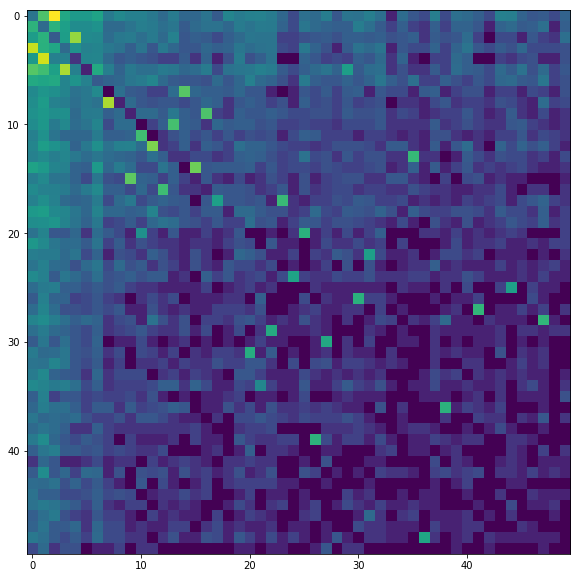

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(graph+1)[:50,:50])
plt.show()

In [171]:
graph_list = [x.tolist() for x in graph.astype(int)[:, :]]

In [175]:
import networkx as nx

In [176]:
def to_graph(gr, edges_num):
    G=nx.DiGraph()
    G.add_nodes_from(np.arange(gr.shape[0]))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        #gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

In [177]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

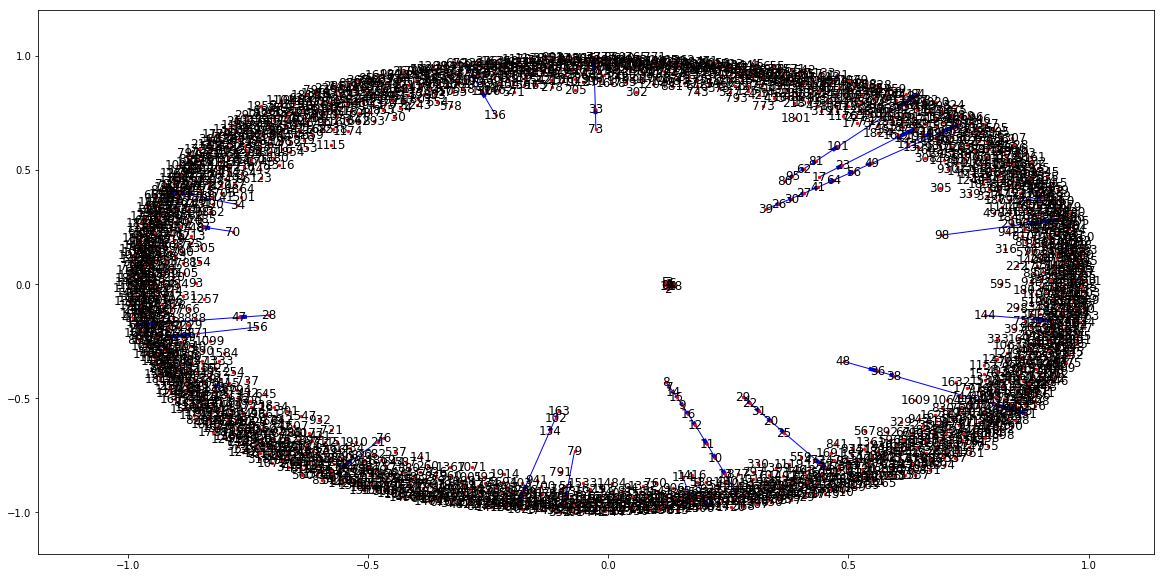

In [178]:

pairs, G = to_graph(graph, 68)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=5)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()